In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
seed = 2407

In [2]:
# Load data
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# Drop the 'Over18', 'EmployeeNumber', 'StandardHours' and 'EmployeeCount' columns
df.drop('EmployeeNumber', axis=1, inplace=True)
df.drop('Over18', axis=1, inplace=True)
df.drop('StandardHours', axis=1, inplace=True)
df.drop('EmployeeCount', axis=1, inplace=True)

# Since 'MonthlyIncome' is more a accurate indicator of employee salary
df.drop('DailyRate', axis=1, inplace=True)
df.drop('HourlyRate', axis=1, inplace=True)
df.drop('MonthlyRate', axis=1, inplace=True)

# Drop Organistional factors
df.drop('BusinessTravel', axis=1, inplace=True)
df.drop('Department', axis=1, inplace=True)
df.drop('JobInvolvement', axis=1, inplace=True)
df.drop('JobLevel', axis=1, inplace=True)
df.drop('JobRole', axis=1, inplace=True)
df.drop('MonthlyIncome', axis=1, inplace=True)
df.drop('OverTime', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)
df.drop('StockOptionLevel', axis=1, inplace=True)
df.drop('TrainingTimesLastYear', axis=1, inplace=True)
df.drop('WorkLifeBalance', axis=1, inplace=True)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [4]:
# Label categorical data
from sklearn.preprocessing import OrdinalEncoder

# Nominal variables
df['Attrition'] = df['Attrition'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

# Ordinal variables
df['Education'] = df['Education'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True))
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['JobSatisfaction'] = df['JobSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=True))

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   DistanceFromHome          1470 non-null   int64   
 3   Education                 1470 non-null   category
 4   EducationField            1470 non-null   category
 5   EnvironmentSatisfaction   1470 non-null   category
 6   Gender                    1470 non-null   category
 7   JobSatisfaction           1470 non-null   category
 8   MaritalStatus             1470 non-null   category
 9   NumCompaniesWorked        1470 non-null   int64   
 10  PerformanceRating         1470 non-null   int64   
 11  RelationshipSatisfaction  1470 non-null   category
 12  TotalWorkingYears         1470 non-null   int64   
 13  YearsAtCompany            1470 non-null   int64 

,Age,DistanceFromHome,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.693197,3.153741,11.279592,7.008163,4.229252
std,9.135373,8.106864,2.498009,0.360824,7.780782,6.126525,3.623137
min,18.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,1.000000,3.000000,6.000000,3.000000,2.000000
50%,36.000000,7.000000,2.000000,3.000000,10.000000,5.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,15.000000,9.000000,7.000000
max,60.000000,29.000000,9.000000,4.000000,40.000000,40.000000,18.000000


In [6]:
from scipy.stats import mstats

# log transformation
df["TotalWorkingYears"] = np.log1p(df["TotalWorkingYears"])
df["YearsAtCompany"] = np.log1p(df["YearsAtCompany"])
df["DistanceFromHome"] = np.log1p(df["DistanceFromHome"])
df["NumCompaniesWorked"] = np.log1p(df["NumCompaniesWorked"])

# winsorization
df["YearsInCurrentRole"] = mstats.winsorize(df["YearsInCurrentRole"], limits=[0, 0.1])

In [7]:
# One-hot-encoding
df = pd.get_dummies(df, drop_first=True)
df

,Age,DistanceFromHome,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,Attrition_Yes,Education_2,Education_3,...,EnvironmentSatisfaction_4,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4
0,41,0.693147,2.197225,3,2.197225,1.945910,4,True,True,False,...,False,False,False,False,True,False,True,False,False,False
1,49,2.197225,0.693147,4,2.397895,2.397895,7,False,False,False,...,False,True,True,False,False,True,False,False,False,True
2,37,1.098612,1.945910,3,2.079442,0.000000,0,True,True,False,...,True,True,False,True,False,False,True,True,False,False
3,33,1.386294,0.693147,3,2.197225,2.197225,7,False,False,False,...,True,False,False,True,False,True,False,False,True,False
4,27,1.098612,2.302585,3,1.945910,1.098612,2,False,False,False,...,False,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3.178054,1.609438,3,2.890372,1.791759,2,False,True,False,...,False,True,False,False,True,True,False,False,True,False
1466,39,1.945910,1.609438,3,2.302585,2.079442,7,False,False,False,...,True,True,False,False,False,True,False,False,False,False
1467,27,1.609438,0.693147,4,1.945910,1.945910,2,False,False,True,...,False,True,True,False,False,True,False,True,False,False
1468,49,1.098612,1.098612,3,2.890372,2.302585,6,False,False,True,...,True,True,True,False,False,True,False,False,False,True


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, roc_curve
import tensorflow as tf

In [9]:
# Separate features from predicted variable for each age group
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True)

In [11]:
# Split the data into validation and testing sets
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, shuffle=True)

# 70% train, 15% test, 15% validation

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)
X_scaled_validation = scaler.transform(X_validation)

In [13]:
# Balance the data sets
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=seed)
X_smote_train, y_smote_train = oversampler.fit_resample(X_scaled_train, y_train)

In [14]:
# Balance the data sets
from imblearn.over_sampling import ADASYN
oversampler = ADASYN(random_state=seed)
X_adasyn_train, y_adasyn_train = oversampler.fit_resample(X_scaled_train, y_train)

<h1>Logistic Regression</h1>
Logistic Regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes, typically denoted as 0 and 1. It is a type of regression analysis that models the probability of a binary outcome based on one or more predictor variables.

In Logistic Regression, the relationship between the predictor variables and the binary outcome is modeled using the logistic (sigmoid) function. The logistic function maps any input value to a value between 0 and 1, representing the probability of the positive outcome. The model estimates the coefficients for each predictor variable, which indicate the strength and direction of the relationship between the predictors and the outcome.

Logistic Regression assumes that the relationship between the predictors and the log odds of the outcome is linear. The log odds are then transformed using the logistic function to obtain the probability of the positive outcome.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [16]:
# Create a base logistic regression model
logistic_model = LogisticRegression(random_state=seed)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=2407)

In [17]:
# Predictions
y_train_pred = logistic_model.predict(X_train)
y_validation_pred = logistic_model.predict(X_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.862209    0.785714  0.859086     0.823961      0.849645
recall       0.989535    0.195266  0.859086     0.592401      0.859086
f1-score     0.921494    0.312796  0.859086     0.617145      0.821523
support    860.000000  169.000000  0.859086  1029.000000   1029.000000


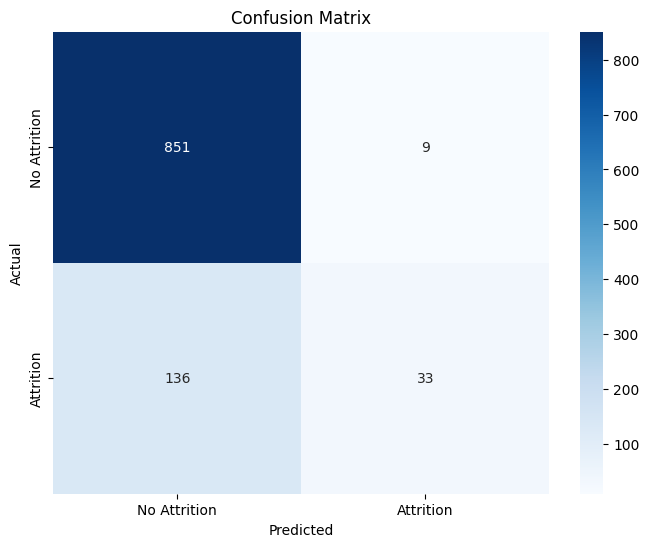

In [18]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.872642   0.500000  0.859091    0.686321      0.820133
recall       0.978836   0.129032  0.859091    0.553934      0.859091
f1-score     0.922693   0.205128  0.859091    0.563911      0.821582
support    189.000000  31.000000  0.859091  220.000000    220.000000


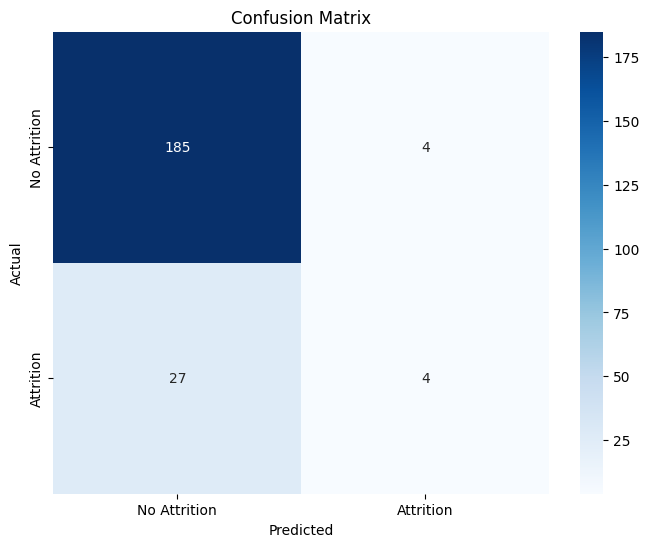

In [19]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As seen, while accuracy of the model on the test set is high (0.846939), this is due to the large number of true negatives. The model tends to predict "No Attrition" for most rows as it increases accuracy. Hence, to increase the number of "Attrition" predictions, a different metric needs to be used.

This is because logistic regression is optimised by maximising the log-likelihood objective function, which assumes equal importance for each class and aims to maximise overall accuracy. However, when dealing with imbalanced data, this approach can lead to models that are biased towards the majority class.

In the context of imbalanced data, the disproportionate representation of the majority class can overshadow the minority class, leading to suboptimal model performance. This bias towards the majority class can result in lower predictive accuracy for the minority class and misrepresentation of the true underlying patterns in the data.

Therefore, it's essential to class imbalance by using resampling methods like SMOTE or ADASYN, or adjusting the classification threshold. By doing so, we can mitigate the bias towards the majority class and improve the model's ability to accurately predict outcomes for both classes.

GridSearchCV is used to optimise the parameters of the logistic regression model. GridSearchCV performs an exhaustive search of specified parameter values to determine the most appropriate combination of values that results in the best performance for our dataset.


In [20]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [21]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [22]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Recall Score: 0.7116279069767442


In [23]:
# Best model
smote_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = smote_logistic_model.predict(X_smote_train)
y_validation_pred = smote_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.715466    0.709049  0.712209     0.712258      0.712258
recall       0.704651    0.719767  0.712209     0.712209      0.712209
f1-score     0.710018    0.714368  0.712209     0.712193      0.712193
support    860.000000  860.000000  0.712209  1720.000000   1720.000000


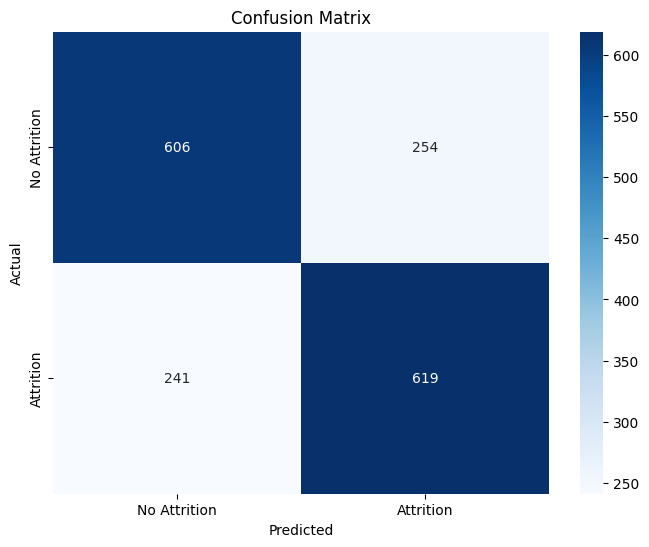

In [24]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.927007   0.253012  0.672727    0.590010      0.832035
recall       0.671958   0.677419  0.672727    0.674689      0.672727
f1-score     0.779141   0.368421  0.672727    0.573781      0.721267
support    189.000000  31.000000  0.672727  220.000000    220.000000


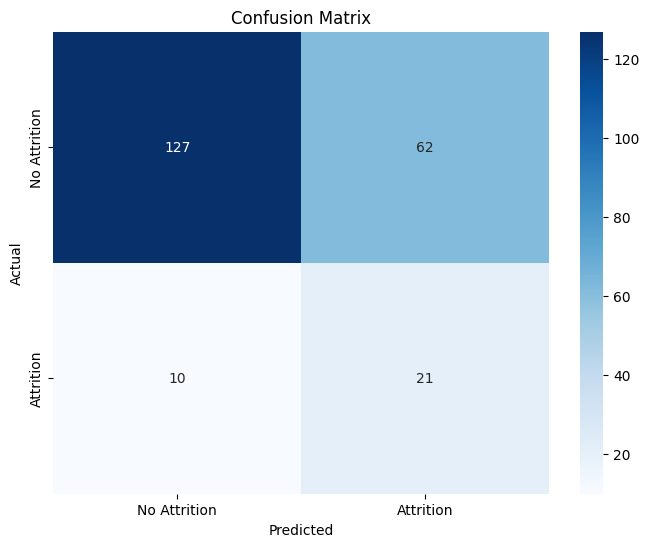

In [25]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.898734   0.333333  0.737557    0.616034      0.804074
recall       0.771739   0.567568  0.737557    0.669653      0.737557
f1-score     0.830409   0.420000  0.737557    0.625205      0.761698
support    184.000000  37.000000  0.737557  221.000000    221.000000


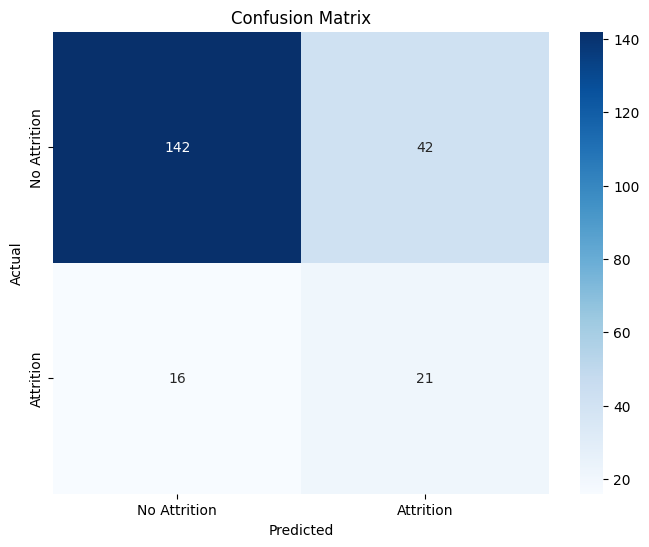

In [26]:
# Finally, predict on test set
y_test_pred = smote_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Hyperparameter Tuning with Grid Search
param_grid = {'penalty': ['none', 'l1', 'l2'],
              'C': [0.01, 0.1, 1, 10],
              'solver': ['lbfgs', 'sag', 'saga']
              }

In [28]:
logistic_model = LogisticRegression(random_state=seed)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=2407),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             scoring='recall')

In [29]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
Best Recall Score: 0.6751025991792065


In [30]:
# Best model
adasyn_logistic_model = grid_search.best_estimator_

# Predictions
y_train_pred = adasyn_logistic_model.predict(X_adasyn_train)
y_validation_pred = adasyn_logistic_model.predict(X_scaled_validation)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.697076    0.693380  0.695221     0.695228      0.695232
recall       0.693023    0.697430  0.695221     0.695227      0.695221
f1-score     0.695044    0.695399  0.695221     0.695221      0.695221
support    860.000000  856.000000  0.695221  1716.000000   1716.000000


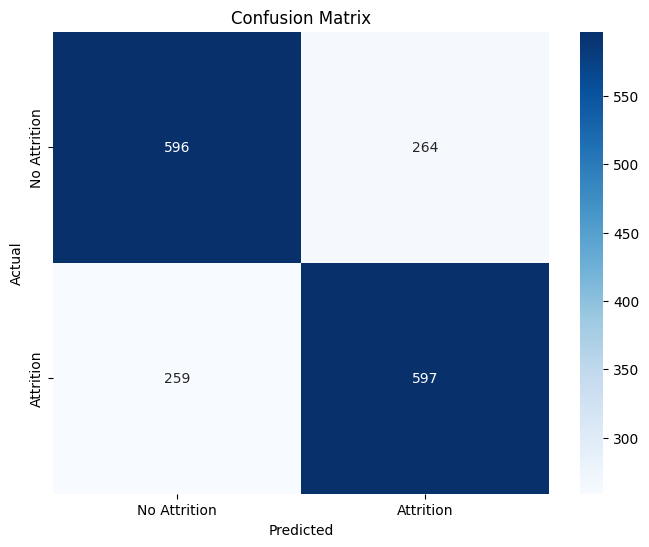

In [31]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.932836   0.255814  0.668182    0.594325      0.837437
recall       0.661376   0.709677  0.668182    0.685527      0.668182
f1-score     0.773994   0.376068  0.668182    0.575031      0.717922
support    189.000000  31.000000  0.668182  220.000000    220.000000


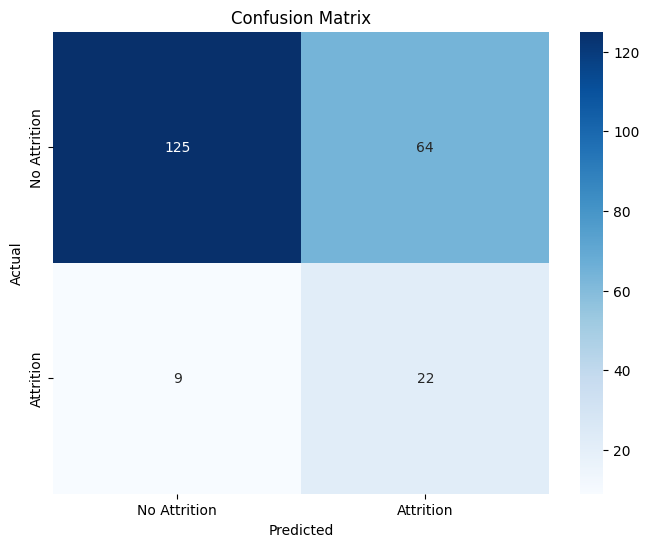

In [32]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.910345   0.315789  0.705882    0.613067      0.810804
recall       0.717391   0.648649  0.705882    0.683020      0.705882
f1-score     0.802432   0.424779  0.705882    0.613605      0.739205
support    184.000000  37.000000  0.705882  221.000000    221.000000


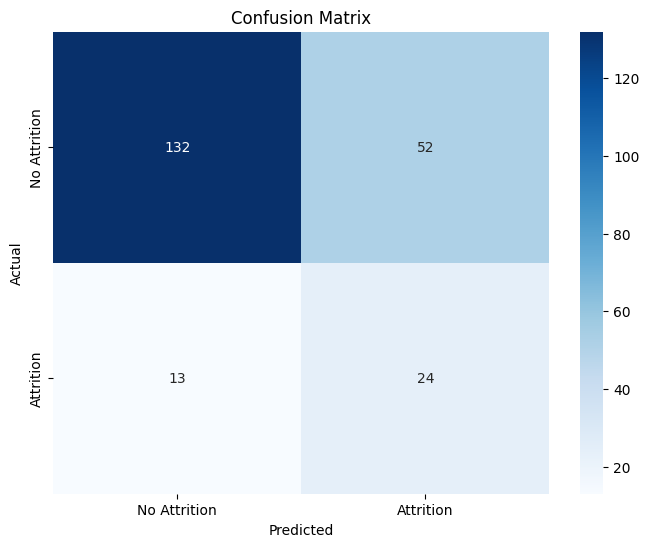

In [33]:
# Finally, predict on test set
y_test_pred = adasyn_logistic_model.predict(X_scaled_test)

print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN achieved a higher recall on the test set, with a final recall of 0.81 and precision of 0.49.

Finally, the ROC curve for logistic regression trained on SMOTE is plotted. The ROC curve is a graphical representation of the TPR against the FPR for various threshold values of the classifier.

A steeper ROC curve closer to the top-left corner indicates better performance, and a higher AUC value indicates better discrimination ability of the classifier.

In [34]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [35]:
y_pred_log = adasyn_logistic_model.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_log, tpr_log, thresholds_keras = roc_curve(y_test, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

# Calculate the Precision-Recall curve
precision_log, recall_log, _ = precision_recall_curve(y_test, y_pred_log)
pr_auc_log = average_precision_score(y_test, y_pred_log)

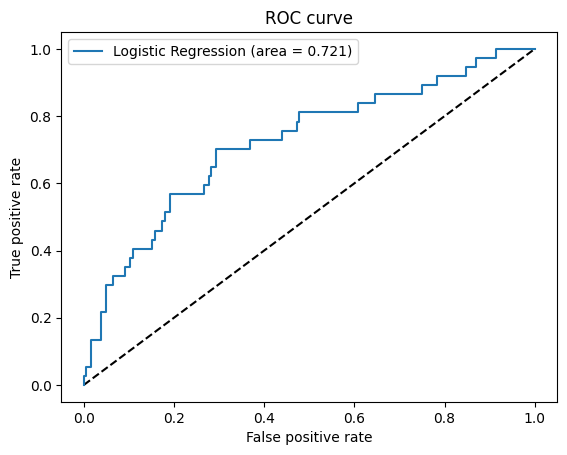

In [36]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = {:.3f})'.format(auc_log))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

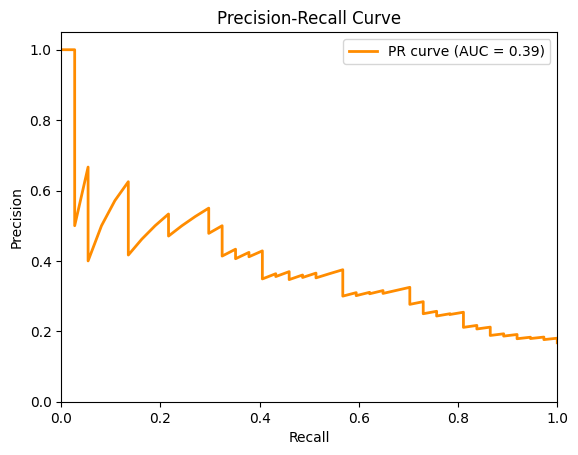

In [37]:
# Plot the Precision-Recall curve
plt.plot(recall_log, precision_log, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_log)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

An AUC of 0.86 implies that the curve generally performs well in differentiating between the classes, as it's closer to the perfect value of 1.

In the case of our business problem, maximising true positives is more crucial than minimising false positives. As such, the optimal model is one which lies closer to the top of the curve. 

<h1>Neural Network</h1>

A neural network is a computational model consisting of interconnected neurons organised into layers. Each neuron receives input signals, performs a weighted sum of these inputs, applies an activation function to the sum, and then passes the result to the neurons in the next layer. Neural networks are capable of learning complex patterns and relationships from data through a process called training, where the network adjusts its weights and biases to minimise the difference between the predicted and actual outputs.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [39]:
# Create a basic neural network with one hidden layer which squishes the data into range 0-1
def neural_network(X_train):
    # Defining the model
    model = Sequential([
        Dense(X_train.shape[1], activation='relu'),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ])
    
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'accuracy'
                    ])
    
    return model

In [40]:
model_nn = neural_network(X_scaled_train)
 
history = model_nn.fit(X_scaled_train, y_train, batch_size=128,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    )


Epoch 1/25


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6001 - loss: 0.6656 - val_accuracy: 0.8455 - val_loss: 0.5416
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8270 - loss: 0.5306 - val_accuracy: 0.8591 - val_loss: 0.4661
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.4827 - val_accuracy: 0.8591 - val_loss: 0.4298
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.4542 - val_accuracy: 0.8591 - val_loss: 0.4156
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.4596 - val_accuracy: 0.8591 - val_loss: 0.4104
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8265 - loss: 0.4567 - val_accuracy: 0.8591 - val_loss: 0.4094
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.4345 - val_accuracy: 0.8591 - val_loss: 0.4060
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.4277 - val_accuracy: 0.8591 - val_loss: 0.4019
Epoch 9/25
9/9 ━━━

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step


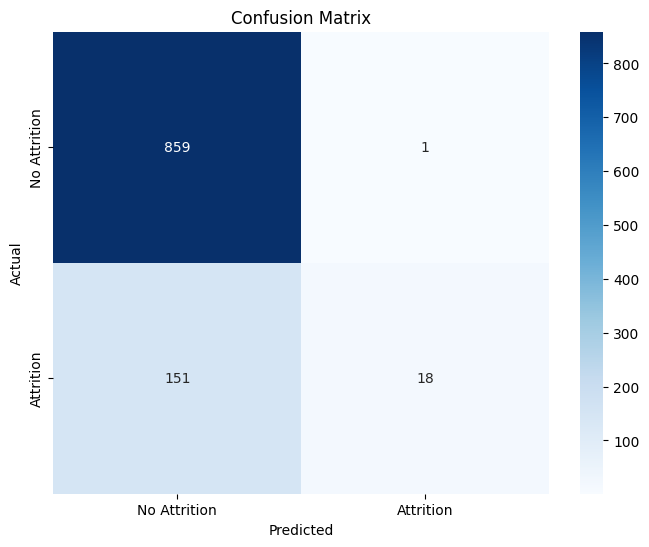

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.850495    0.947368  0.852284     0.898932      0.866405
recall       0.998837    0.106509  0.852284     0.552673      0.852284
f1-score     0.918717    0.191489  0.852284     0.555103      0.799279
support    860.000000  169.000000  0.852284  1029.000000   1029.000000


In [41]:
# Test the model accuracy
y_pred_prob = model_nn.predict(X_scaled_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_train_np = y_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


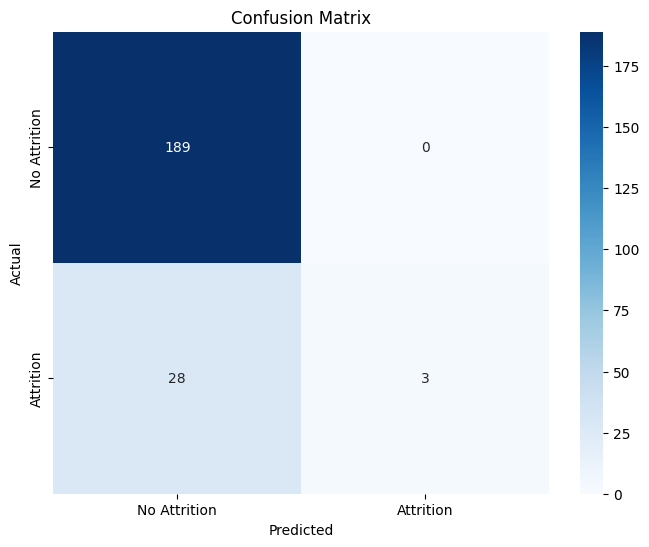

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.870968   1.000000  0.872727    0.935484      0.889150
recall       1.000000   0.096774  0.872727    0.548387      0.872727
f1-score     0.931034   0.176471  0.872727    0.553753      0.824710
support    189.000000  31.000000  0.872727  220.000000    220.000000


In [42]:
# Test the model accuracy on the validation set
y_pred_prob = model_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

Although the model accuracy is high, this is due to the large number of rows with attrition equal to "False" compared to "True". Predicting all "False" would already result in a very high accuracy. However, since identifying attrition is the goal, it is important to identify all cases where attrition is present even if they are wrongly identified (i.e. maximising recall). As such, hyperparameter tuning is needed. Moreover, the model is overfitted as train accuracy is 100% but test accuracy is only 86%. Early stopping is needed to allow generalisation to unseen data.

Train a better model by tuning hyperparameters:

Add another layer - map out more complex features<br>
Vary number of nodes - reduce impact of irrelevant features<br>
Change activation function - allows the model to identify non-linear patterns in a different way<br>
Use 'AUC', 'precision', 'recall', 'f1_score' metrics - maximise precision and recall over accuracy<br>
Reduce batch size - allow model to fit the train data better at the expense of time<br>
Use early stopping - ensure that model does not overfit to train data

In [43]:
def optimised_neural_network(X_train):
    # Defining the model
    model = Sequential()
    model.add(Dense(X_train.shape[1], activation='tanh'))
    model.add(Dense(60, activation = 'tanh'))
    model.add(Dense(40, activation = 'tanh'))
    model.add(Dense(1, activation = 'sigmoid'))
 
    # Compiling the model
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[
                        'recall',
                    ])
    
    return model

In [44]:
# Stop early to prevent overfitting
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

In [45]:
model2_nn = optimised_neural_network(X_smote_train)
 
history = model2_nn.fit(X_smote_train, y_smote_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6523 - recall: 0.6450 - val_loss: 0.5966 - val_recall: 0.7097
Epoch 2/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.5507 - recall: 0.7417 - val_loss: 0.5529 - val_recall: 0.6452
Epoch 3/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 0.5118 - recall: 0.7532 - val_loss: 0.5486 - val_recall: 0.6129
Epoch 4/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.4907 - recall: 0.7592 - val_loss: 0.5256 - val_recall: 0.6129
Epoch 5/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.4487 - recall: 0.8067 - val_loss: 0.5019 - val_recall: 0.6452
Epoch 6/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.4185 - recall: 0.8400 - val_loss: 0.5031 - val_recall: 0.5806
Epoch 7/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.3721 - recall: 0.8477 - val_loss: 0.5004 - val_recall: 0.6129
Epoch 8/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3521 - recall: 0.8876 - val_loss: 0.5025 - val_recall: 0.4839
Epoch

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


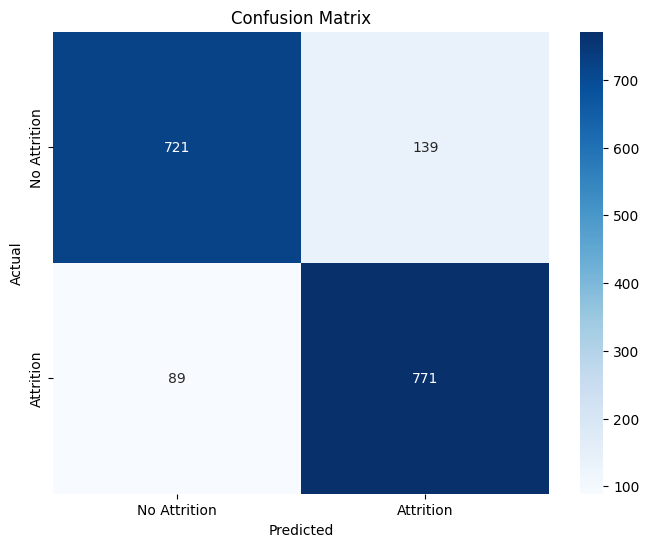

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.890123    0.847253  0.867442     0.868688      0.868688
recall       0.838372    0.896512  0.867442     0.867442      0.867442
f1-score     0.863473    0.871186  0.867442     0.867330      0.867330
support    860.000000  860.000000  0.867442  1720.000000   1720.000000


In [46]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_smote_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_smote_train_np = y_smote_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_smote_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


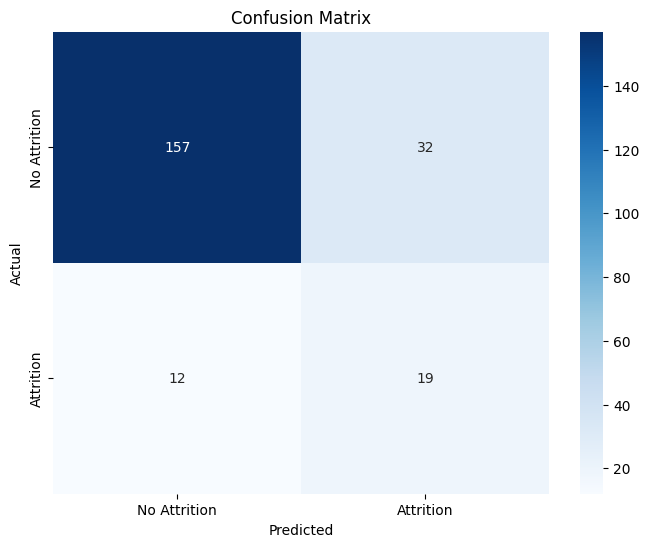

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.928994   0.372549       0.8    0.650772      0.850586
recall       0.830688   0.612903       0.8    0.721796      0.800000
f1-score     0.877095   0.463415       0.8    0.670255      0.818804
support    189.000000  31.000000       0.8  220.000000    220.000000


In [47]:
# Test the model accuracy
y_pred_prob = model2_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


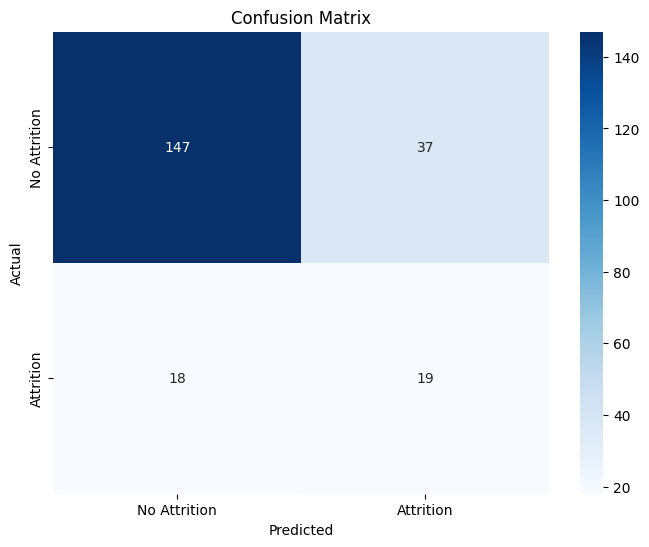

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.890909   0.339286  0.751131    0.615097      0.798556
recall       0.798913   0.513514  0.751131    0.656213      0.751131
f1-score     0.842407   0.408602  0.751131    0.625505      0.769779
support    184.000000  37.000000  0.751131  221.000000    221.000000


In [48]:
# Finally, test the model accuracy on test set
y_pred_prob = model2_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

The recall increase significantly while precision decreases slightly. This shows that the model is able to identify more cases of attrition correctly at the expense of more incorrect predictions. However, as the cost of attrition is greater than the cost to prevent attrition, this decrease in accuracy and precision is justified.

We can find the optimal classification threshold using the ROC curve. The ROC curve compares the ratio of TPR to FPR across different classification thresholds. Finding the balance that maximises TPR (recall) can further optimise the model.

In [49]:
model3_nn = optimised_neural_network(X_adasyn_train)
 
history = model3_nn.fit(X_adasyn_train, y_adasyn_train, batch_size=10,
                    epochs=25, validation_data=(X_scaled_validation, y_validation),
                    callbacks=[earlystopping])

Epoch 1/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6936 - recall: 0.5454 - val_loss: 0.6471 - val_recall: 0.6129
Epoch 2/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.5832 - recall: 0.7253 - val_loss: 0.5996 - val_recall: 0.6452
Epoch 3/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.5366 - recall: 0.7502 - val_loss: 0.5670 - val_recall: 0.6774
Epoch 4/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 0.5064 - recall: 0.7760 - val_loss: 0.5611 - val_recall: 0.6129
Epoch 5/25
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.4632 - recall: 0.7944 - val_loss: 0.5427 - val_recall: 0.6129


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step


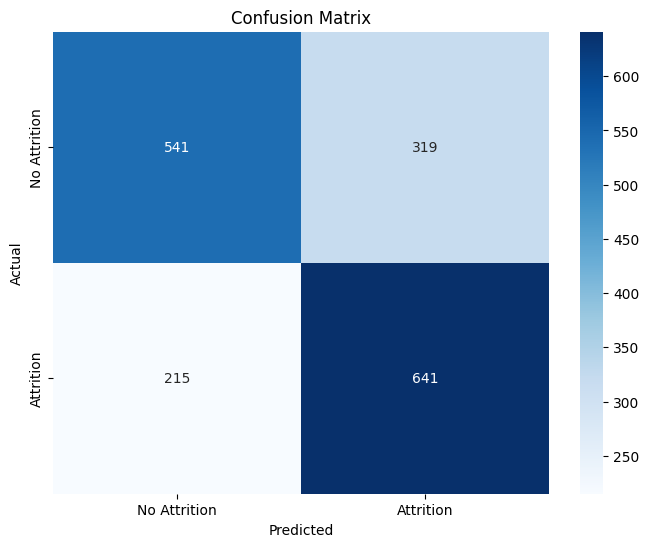

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.715608    0.667708  0.688811     0.691658      0.691714
recall       0.629070    0.748832  0.688811     0.688951      0.688811
f1-score     0.669554    0.705947  0.688811     0.687751      0.687708
support    860.000000  856.000000  0.688811  1716.000000   1716.000000


In [50]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_adasyn_train)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_adasyn_train_np = y_adasyn_train.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_adasyn_train_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


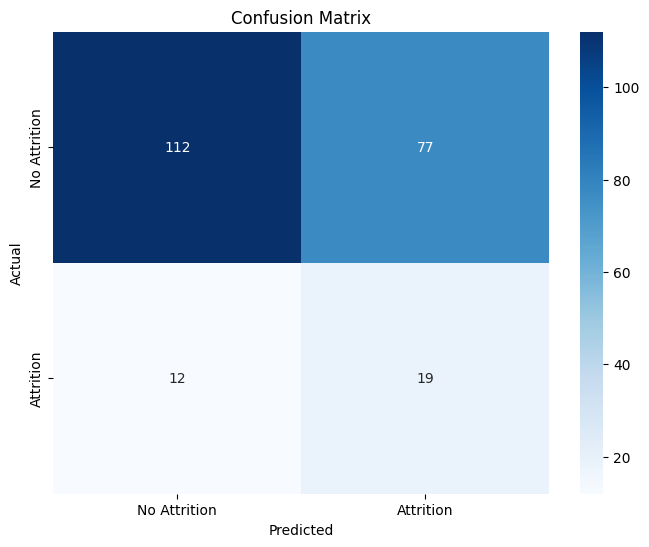

======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.903226   0.197917  0.595455    0.550571      0.803841
recall       0.592593   0.612903  0.595455    0.602748      0.595455
f1-score     0.715655   0.299213  0.595455    0.507434      0.656974
support    189.000000  31.000000  0.595455  220.000000    220.000000


In [51]:
# Test the model accuracy
y_pred_prob = model3_nn.predict(X_scaled_validation)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_validation_np = y_validation.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_validation_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


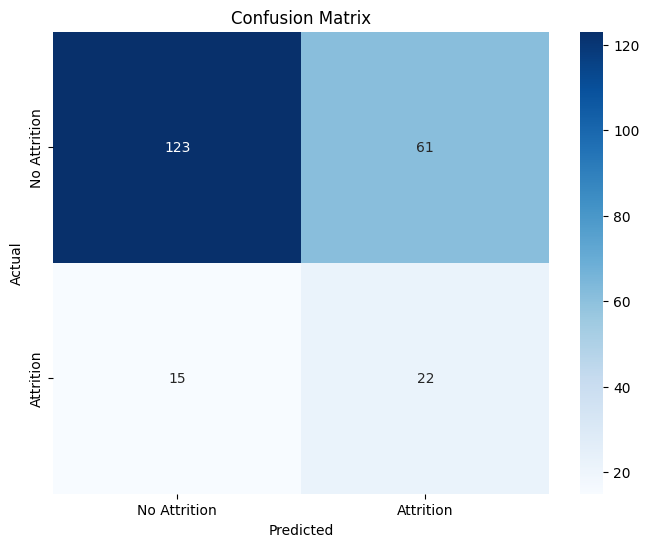

======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.891304   0.265060  0.656109    0.578182      0.786458
recall       0.668478   0.594595  0.656109    0.631536      0.656109
f1-score     0.763975   0.366667  0.656109    0.565321      0.697457
support    184.000000  37.000000  0.656109  221.000000    221.000000


In [52]:
# Test the model accuracy on test set
y_pred_prob = model3_nn.predict(X_scaled_test)

# Convert probabilities to classes
y_pred = tf.round(y_pred_prob)

# Convert tensors to numpy arrays
y_test_np = y_test.astype(int)
y_pred_np = y_pred.numpy().astype(int)

# Calculate the confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(y_test_np, y_pred_np).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

SMOTE produces the better model

In [53]:
y_pred_nn = model2_nn.predict(X_scaled_test).ravel()

# Calculate the ROC curve
fpr_nn, tpr_nn, thresholds_keras = roc_curve(y_test, y_pred_nn)
auc_nn = auc(fpr_nn, tpr_nn)

# Calculate the Precision-Recall curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_nn)
pr_auc_nn = average_precision_score(y_test, y_pred_nn)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


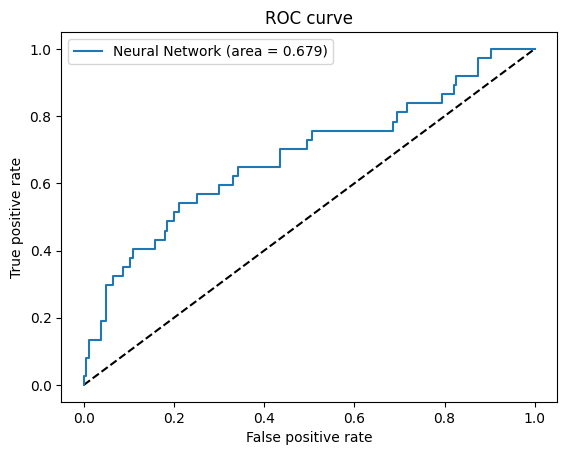

In [54]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = {:.3f})'.format(auc_nn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

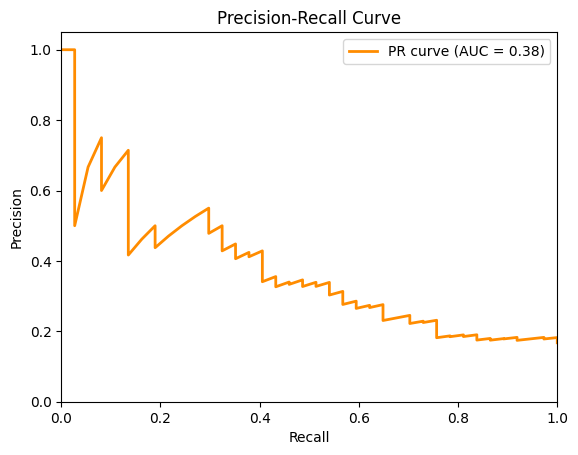

In [55]:
# Plot the Precision-Recall curve
plt.plot(recall_nn, precision_nn, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_nn)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

<h1>CART Decision Tree</h1>

CART is a model that recursively partitions the feature space into disjoint regions, guided by the values of predictor variables, to perform classification or regression tasks. In the context of our business problem, CART builds a binary tree where each internal node represents a decision based on a specific feature, and each leaf node represents a class label. The decision at each node is made by splitting the data into subsets based on a chosen splitting criterion, typically aiming to maximise class purity or minimise impurity measures such as Gini impurity or entropy. CART iteratively selects the best split at each node until a stopping criterion is met, such as reaching a maximum tree depth or a minimum number of samples per leaf. The resulting decision tree provides a transparent and interpretable model for making predictions based on input features.

In the first step, the CART model is fitted on the training dataset without any constraints on tree size. This model grows to its maximum depth, resulting in overfitting to the training data.

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train the decision tree classifier
cart = DecisionTreeClassifier(random_state = seed)
cart.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2407)

======== TRAIN SET RESULTS ========
Accuracy before pruning: 1.0

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


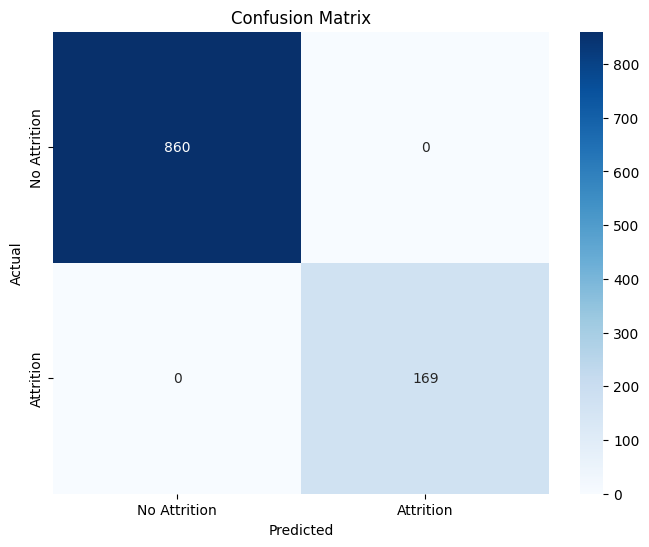

In [57]:
print("======== TRAIN SET RESULTS ========")
# Evaluate accuracy on the train set
y_train_pred = cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========
Accuracy before pruning: 0.7772727272727272

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.880435   0.250000  0.777273    0.565217      0.791601
recall       0.857143   0.290323  0.777273    0.573733      0.777273
f1-score     0.868633   0.268657  0.777273    0.568645      0.784091
support    189.000000  31.000000  0.777273  220.000000    220.000000


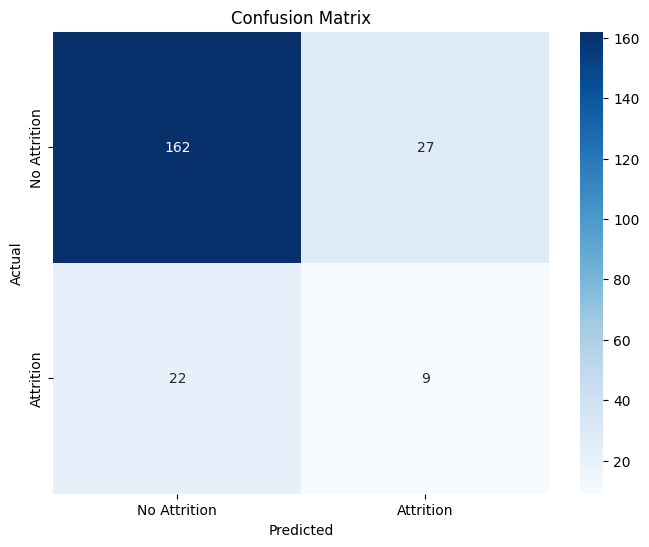

In [58]:

print("\n======== VALIDATION SET RESULTS ========")
# Evaluate accuracy on the test set
y_validation_pred = cart.predict(X_validation)
accuracy_before_pruning = accuracy_score(y_validation, y_validation_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

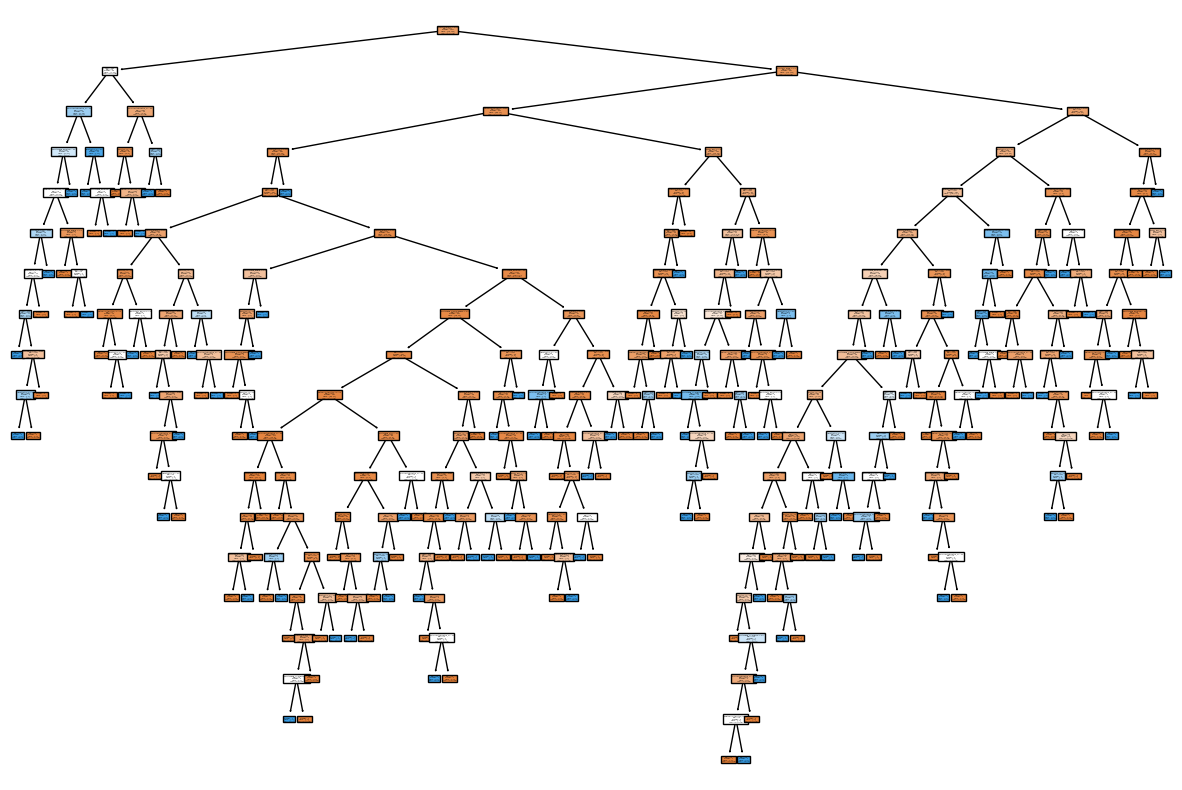

In [59]:
# Plot the tree without pruning
plt.figure(figsize=(15, 10))
plot_tree(cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In the next step, the CART model is pruned at the optimal complexity parameter (CP). CP is a regularisation parameter that controls the trade-off between tree complexity and model performance. It penalises overly complex trees to prevent overfitting.

The CP error is minimised by selecting an optimal value for the complexity parameter through cross-validation, where different values of CP are evaluated, and the one that minimises validation error is chosen.

Pruning involves removing or collapsing certain branches of the decision tree to reduce its complexity and improve generalisation. 
Using cost-complexity pruning, nodes with the smallest increase in the complexity parameter (CP) error are removed iteratively. This is done until further pruning leads to a significant increase in validation error.

In [60]:
from sklearn.model_selection import cross_val_score

# Train decision trees with different depths (max depth = 22)
carts = []
depths = range(1, 17)

for depth in depths:
    cart = DecisionTreeClassifier(random_state = seed, max_depth=depth)

    # Perform cross-validation
    cv_scores = cross_val_score(cart, X_train, y_train, cv=10, scoring='recall')

    # Calculate mean cross-validation error
    cv_error = 1 - cv_scores.mean()
    carts.append(cv_error)

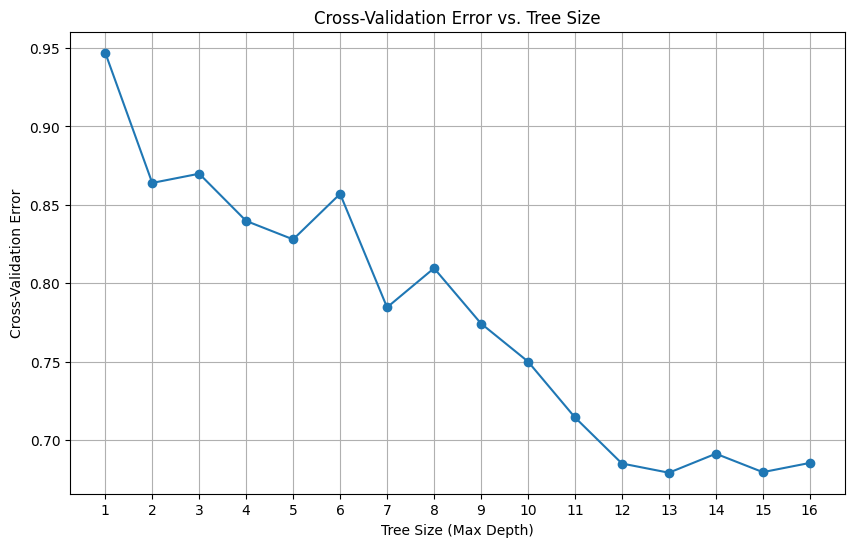

In [61]:
# Plot cross-validation error against tree size
plt.figure(figsize=(10, 6))
plt.plot(depths, carts, marker='o', linestyle='-')
plt.title('Cross-Validation Error vs. Tree Size')
plt.xlabel('Tree Size (Max Depth)')
plt.ylabel('Cross-Validation Error')
plt.xticks(depths)
plt.grid(True)
plt.show()

In [62]:
# Find the index of the lowest cross-validation error
carts = np.array(carts)
min_error_index = np.argmin(carts)

# Calculate standard deviation of cross-validation errors
std_error = np.std(carts)

# Find one standard error above the lowest cross-validation error
one_std_error_above_min = carts[min_error_index] + std_error
print(one_std_error_above_min)

0.7608746927528217


In [63]:
carts
# Therefore, tree should be pruned at depth 9

array([0.94705882, 0.86397059, 0.86985294, 0.83970588, 0.82794118,
       0.85698529, 0.78455882, 0.80955882, 0.77426471, 0.75      ,
       0.71433824, 0.68492647, 0.67904412, 0.69117647, 0.67941176,
       0.68529412])

In [64]:
# Prune the decision tree with the optimal ccp_alpha
pruned_cart = DecisionTreeClassifier(random_state = seed, max_depth = 9)
pruned_cart.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=2407)

In [65]:
# Evaluate accuracy on the test set after pruning
y_pruned_pred = pruned_cart.predict(X_train)
accuracy_after_pruning = accuracy_score(y_train, y_pruned_pred)
print(f'Accuracy after pruning: {accuracy_after_pruning}')

Accuracy after pruning: 0.9397473275024295


======== TRAIN SET RESULTS ========
Accuracy before pruning: 0.9397473275024295

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.937500    0.957265  0.939747     0.947382      0.940746
recall       0.994186    0.662722  0.939747     0.828454      0.939747
f1-score     0.965011    0.783217  0.939747     0.874114      0.935154
support    860.000000  169.000000  0.939747  1029.000000   1029.000000


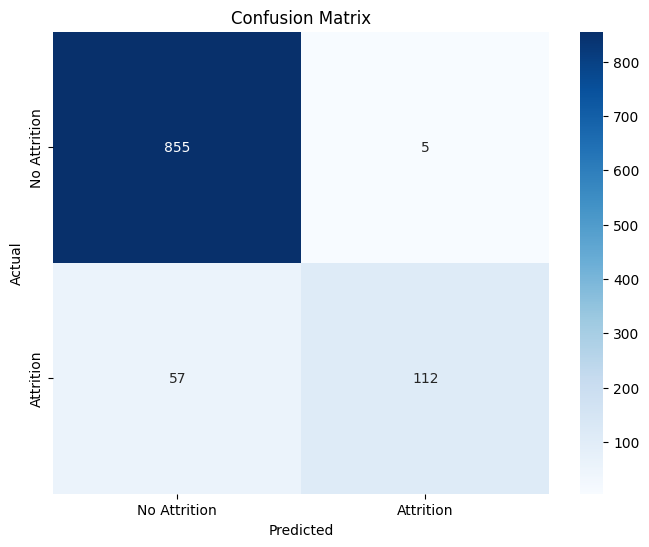

In [66]:
print("======== TRAIN SET RESULTS ========")
y_train_pred = pruned_cart.predict(X_train)
accuracy_before_pruning = accuracy_score(y_train, y_train_pred)
print(f'Accuracy before pruning: {accuracy_before_pruning}')
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.884817   0.310345  0.809091    0.597581      0.803868
recall       0.894180   0.290323  0.809091    0.592251      0.809091
f1-score     0.889474   0.300000  0.809091    0.594737      0.806411
support    189.000000  31.000000  0.809091  220.000000    220.000000


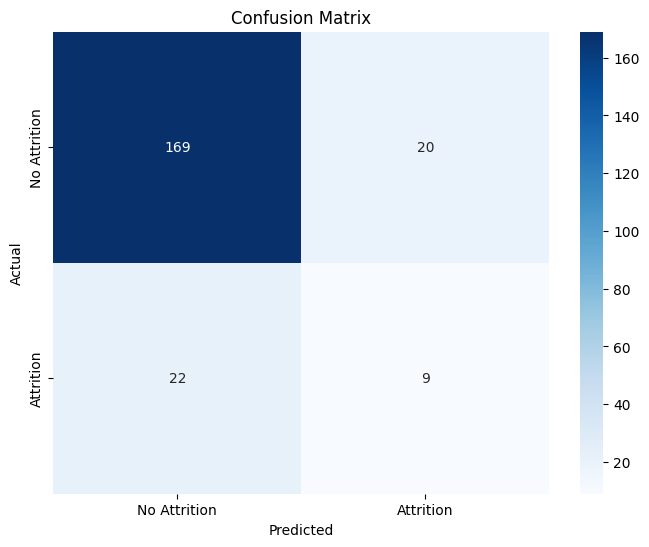

In [67]:
print("\n======== VALIDATION SET RESULTS ========")
y_validation_pred = pruned_cart.predict(X_validation)
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.842640   0.250000  0.778281    0.546320      0.743419
recall       0.902174   0.162162  0.778281    0.532168      0.778281
f1-score     0.871391   0.196721  0.778281    0.534056      0.758437
support    184.000000  37.000000  0.778281  221.000000    221.000000


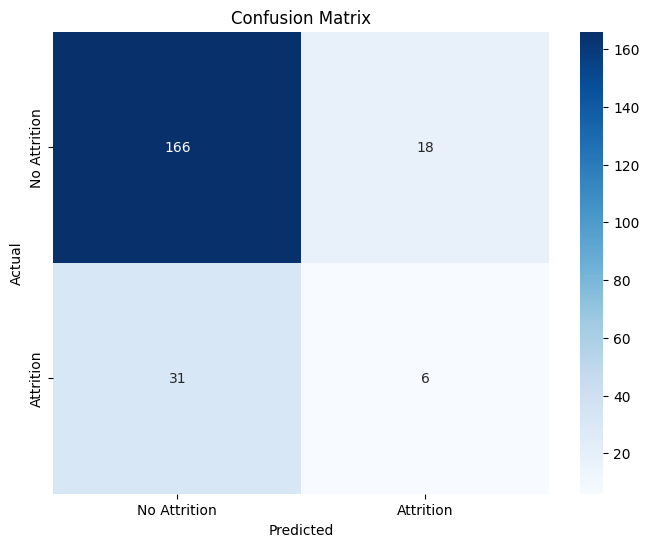

In [68]:
print("\n======== TEST SET RESULTS ========")
y_test_pred = pruned_cart.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

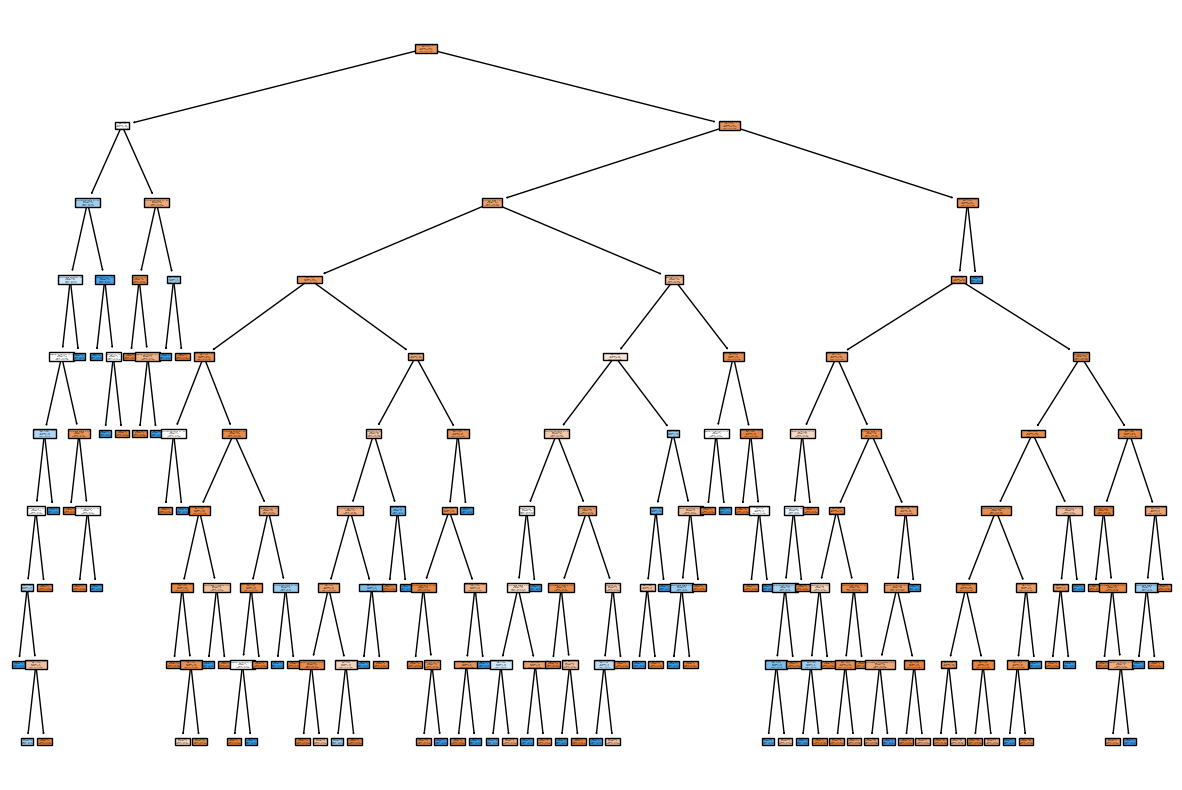

In [69]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

GridSearchCV

In [70]:
# Hyperparameter Tuning with Grid Search
param_grid = {'criterion':['gini','entropy']}

In [71]:
grid_search = GridSearchCV(estimator = pruned_cart, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=2407),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='recall')

In [72]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini'}
Best Accuracy Score: 0.22573529411764706


In [73]:
# Train the decision tree on the optimal parameters
optimised_cart = DecisionTreeClassifier(random_state = seed, max_depth = 8, criterion='entropy')
optimised_cart.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2407)

In [74]:
# Predictions
y_train_pred = optimised_cart.predict(X_train)
y_validation_pred = optimised_cart.predict(X_validation)
y_test_pred = optimised_cart.predict(X_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.898323    0.960000  0.902818     0.929161      0.908453
recall       0.996512    0.426036  0.902818     0.711274      0.902818
f1-score     0.944873    0.590164  0.902818     0.767519      0.886617
support    860.000000  169.000000  0.902818  1029.000000   1029.000000


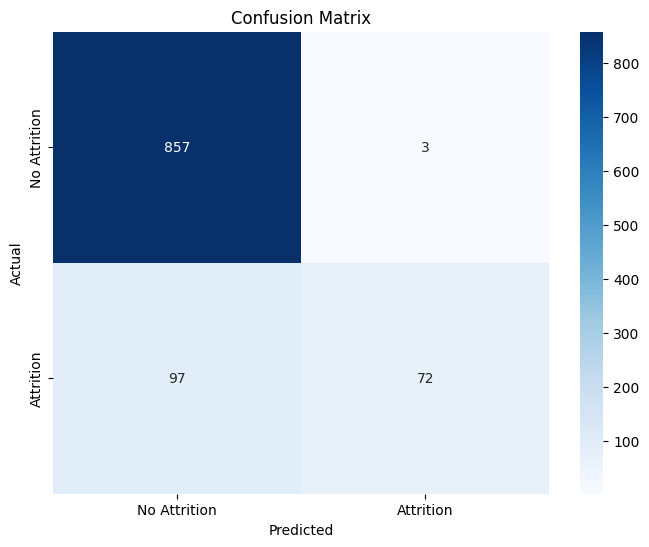

In [75]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_train, y_train_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.870647   0.263158  0.818182    0.566902      0.785046
recall       0.925926   0.161290  0.818182    0.543608      0.818182
f1-score     0.897436   0.200000  0.818182    0.548718      0.799161
support    189.000000  31.000000  0.818182  220.000000    220.000000


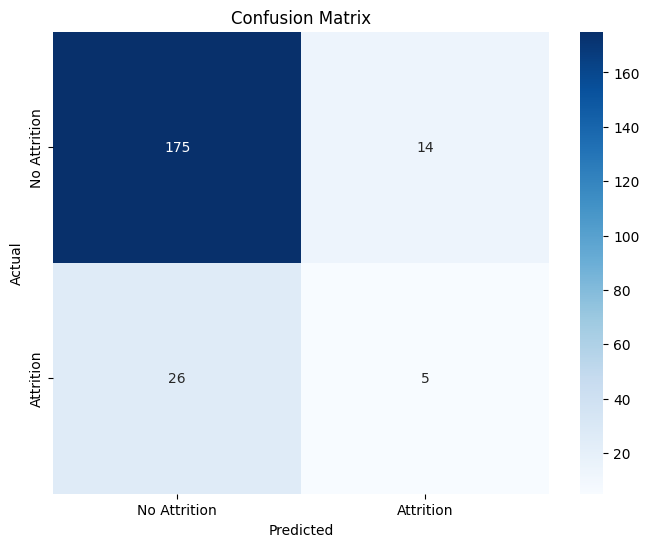

In [76]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.858537   0.500000  0.832579    0.679268      0.798510
recall       0.956522   0.216216  0.832579    0.586369      0.832579
f1-score     0.904884   0.301887  0.832579    0.603386      0.803930
support    184.000000  37.000000  0.832579  221.000000    221.000000


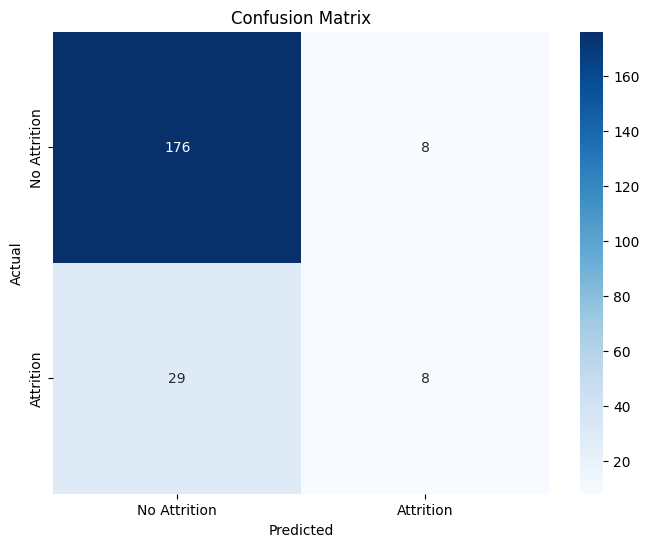

In [77]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

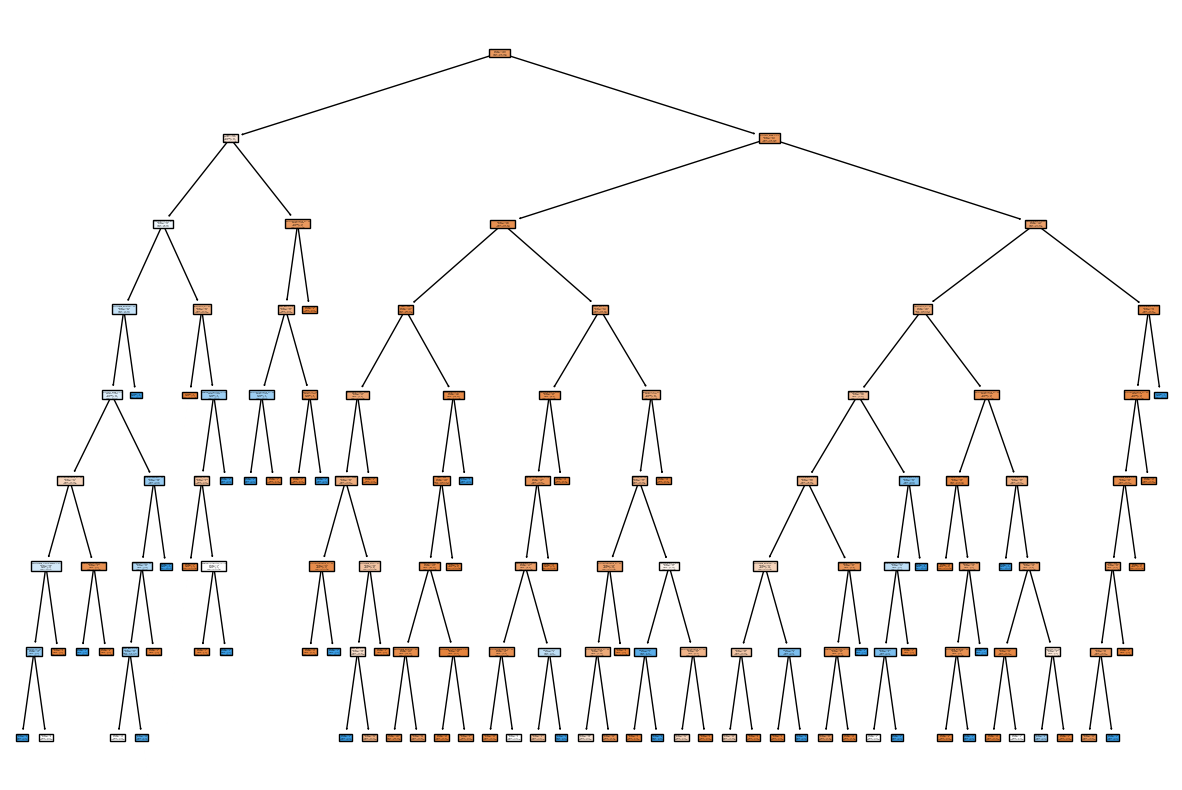

In [78]:
# Plot the pruned tree
plt.figure(figsize=(15, 10))
plot_tree(optimised_cart, filled=True, feature_names=X.columns, class_names=['No Attrition', 'Attrition'])
plt.show()

In [79]:
y_pred_cart = optimised_cart.predict_proba(X_test)[:,1].ravel()

# Calculate the ROC curve
fpr_cart, tpr_cart, thresholds_keras = roc_curve(y_test, y_pred_cart)
auc_cart = auc(fpr_cart, tpr_cart)

# Calculate the Precision-Recall curve
precision_cart, recall_cart, _ = precision_recall_curve(y_test, y_pred_cart)
pr_auc_cart = average_precision_score(y_test, y_pred_cart)

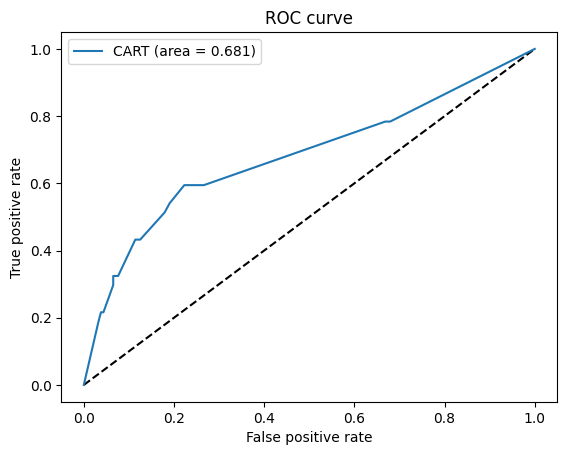

In [80]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cart, tpr_cart, label='CART (area = {:.3f})'.format(auc_cart))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

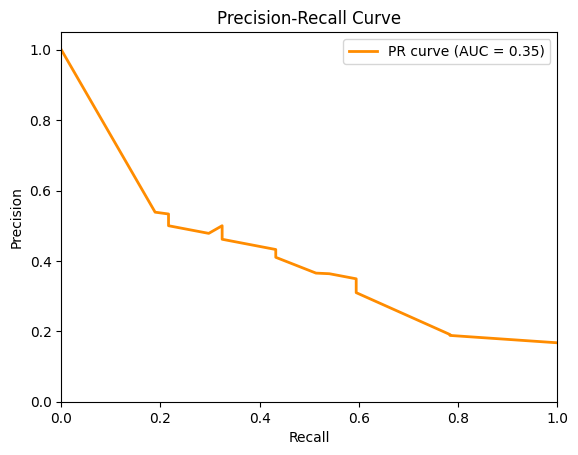

In [81]:
# Plot the Precision-Recall curve
plt.plot(recall_cart, precision_cart, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_cart)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

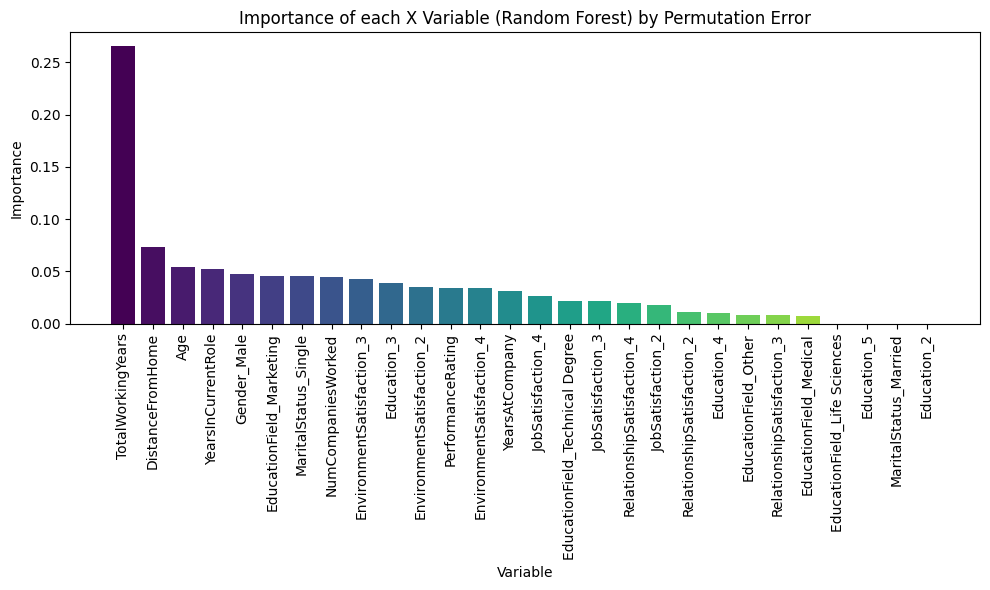

In [82]:
# Variable Importance
var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': optimised_cart.feature_importances_
})

# Sort the DataFrame by importance in descending order
var_importance_sorted = var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(var_importance_sorted['Variable'], var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (CART) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Decision trees are prone to overfitting as they grow to a large depth and capture noise or outliers in the training data.

Decision trees are also sensitive to small variations in the training data, leading to high variance in the model's predictions.

This makes them unable to generalise well to unseen data, particularly when they are overly complex or have not been pruned properly. Small changes in the training data can result in different decision trees, making the model unstable.

As such, an ensemble learning method that addresses the disadvantages of decision trees by aggregating multiple trees is used.

<h1>Random Forest</h1>

Random Forest is an ensemble learning technique that builds multiple decision trees during training and combines their predictions to improve the overall accuracy and robustness of the model. For classification, the final prediction of the Random Forest model is determined by a majority vote among the individual trees.

Random Forest employs a technique called bagging (Bootstrap Aggregating), which involves sampling instances with replacement from the training data to create multiple datasets. Each decision tree is trained independently on a bootstrap sample of the training data and a random subset of the features. This introduces diversity among the trees and helps prevent overfitting and improves generalisation.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, auc

In [84]:
# Train a basic random forest model
rf = RandomForestClassifier(n_estimators = 500, random_state=seed, max_features = "sqrt", oob_score = True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=2407)

======== OOB RESULTS ========
OOB score: 0.8445092322643343
OOB error: 0.15549076773566572


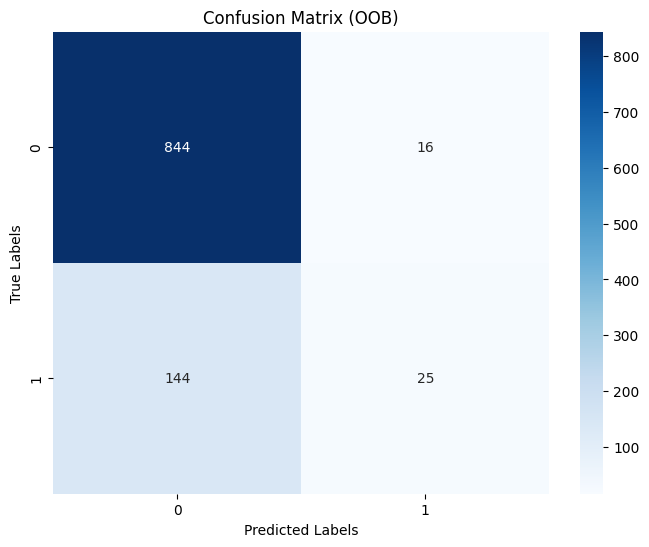

In [85]:
print("======== OOB RESULTS ========")
print("OOB score:", rf.oob_score_)
print("OOB error:", 1 - rf.oob_score_)

# Predictions
y_train_pred = rf.predict(X_train)
y_validation_pred = rf.predict(X_validation)
y_test_pred = rf.predict(X_test)

# Get the predictions on out-of-bag samples
oob_predictions = rf.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
           False   True  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    860.0  169.0       1.0     1029.0        1029.0


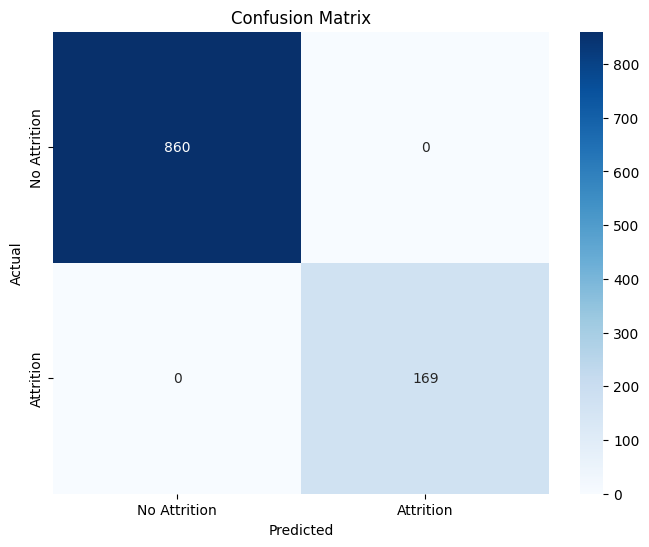

In [86]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.878505   0.833333  0.877273    0.855919      0.872140
recall       0.994709   0.161290  0.877273    0.578000      0.877273
f1-score     0.933002   0.270270  0.877273    0.601636      0.839617
support    189.000000  31.000000  0.877273  220.000000    220.000000


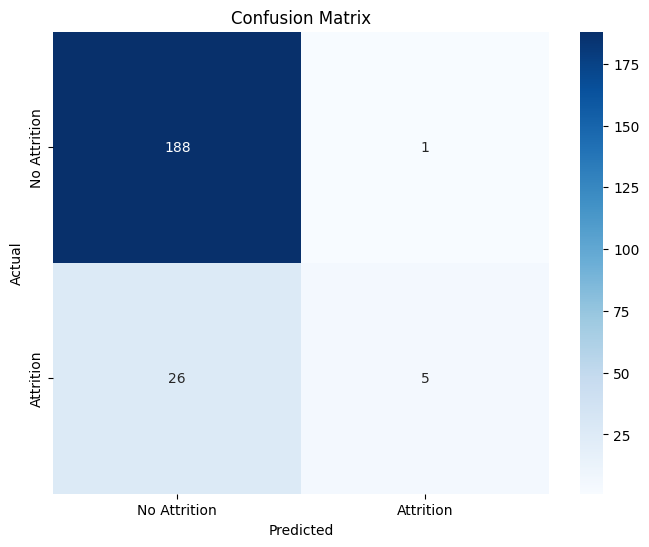

In [87]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The model predicts perfectly on the train set, but has a low recall (0.13). This suggests that the model is overfitted to the train data. Overfitting can be avoided by varying the random subset feature.

SMOTE

In [88]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 500
error_rate = []

for i in range(min_estimators, max_estimators + 1, 5):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

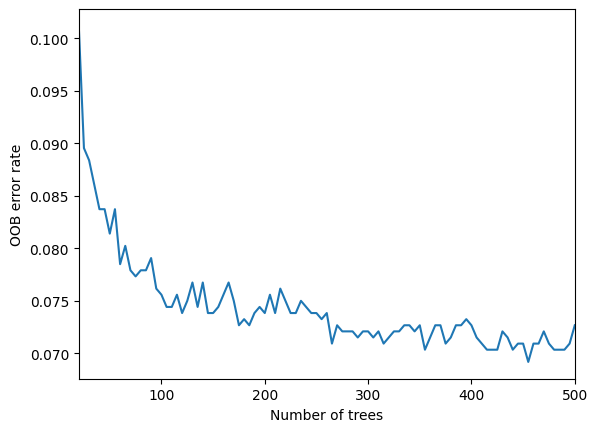

In [89]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.show()

The OOB error rate has not stabilised. As such, more trees are needed.

In [90]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_smote_train, y_smote_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

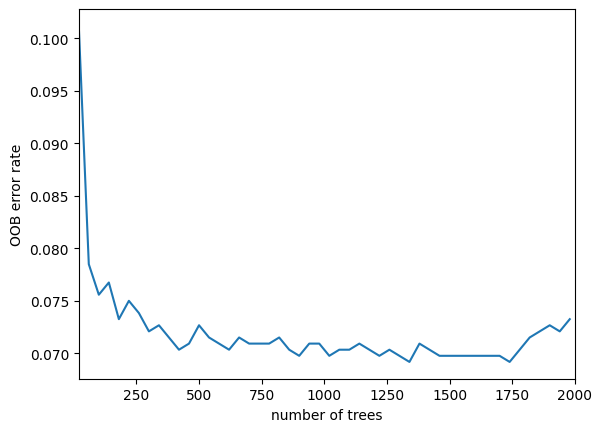

In [91]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [92]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [93]:
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1000)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [94]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.3, 'min_samples_leaf': 2}
Best Accuracy Score: 0.8825581395348838


In [95]:
# Train random forest model
rf_smote = grid_search.best_estimator_
rf_smote.set_params(oob_score=True)
rf_smote.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_features=0.3, min_samples_leaf=2, n_estimators=1000,
                       oob_score=True, random_state=2407)

In [96]:
# Predictions
y_train_pred = rf_smote.predict(X_smote_train)
y_validation_pred = rf_smote.predict(X_scaled_validation)
y_test_pred = rf_smote.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9145348837209303
OOB error: 0.08546511627906972


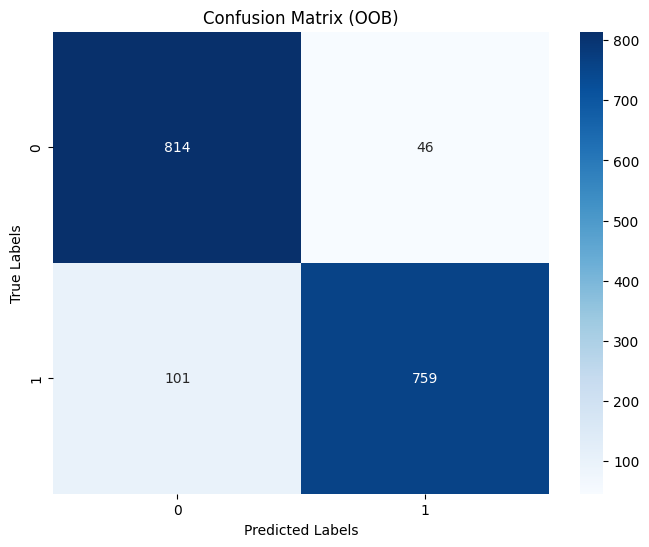

In [97]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_smote.oob_score_)
print("OOB error:", 1 - rf_smote.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_smote.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_smote_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.993056    0.997664  0.995349     0.995360      0.995360
recall       0.997674    0.993023  0.995349     0.995349      0.995349
f1-score     0.995360    0.995338  0.995349     0.995349      0.995349
support    860.000000  860.000000  0.995349  1720.000000   1720.000000


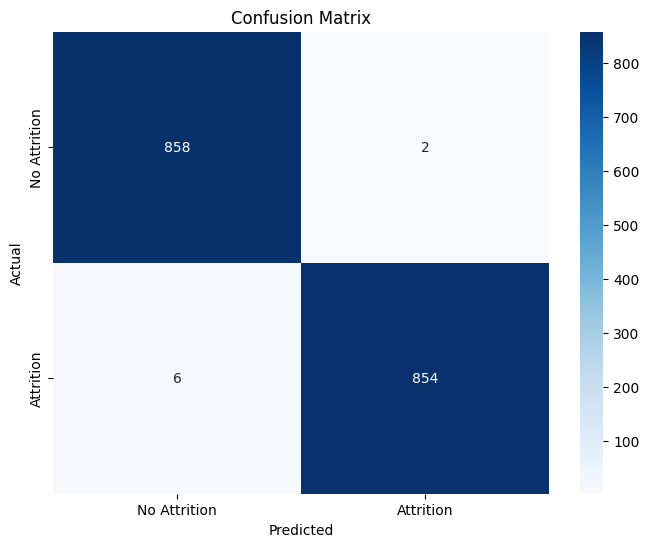

In [98]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.888350   0.571429  0.868182    0.729889      0.843692
recall       0.968254   0.258065  0.868182    0.613159      0.868182
f1-score     0.926582   0.355556  0.868182    0.641069      0.846119
support    189.000000  31.000000  0.868182  220.000000    220.000000


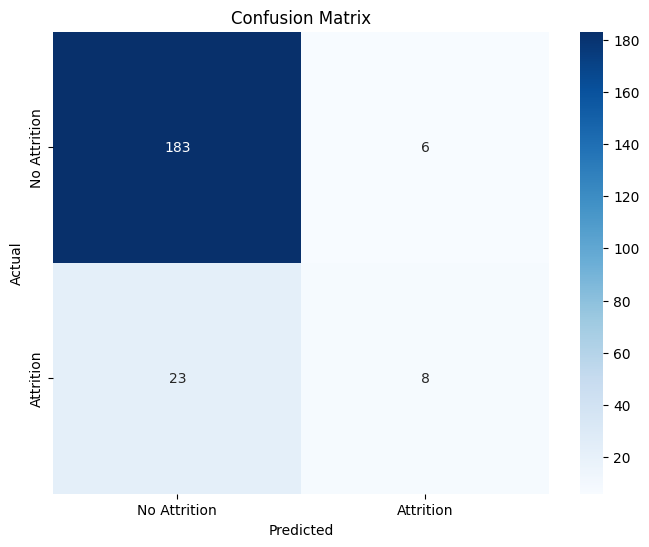

In [99]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.863636   0.434783  0.819005    0.649209      0.791837
recall       0.929348   0.270270  0.819005    0.599809      0.819005
f1-score     0.895288   0.333333  0.819005    0.614311      0.801205
support    184.000000  37.000000  0.819005  221.000000    221.000000


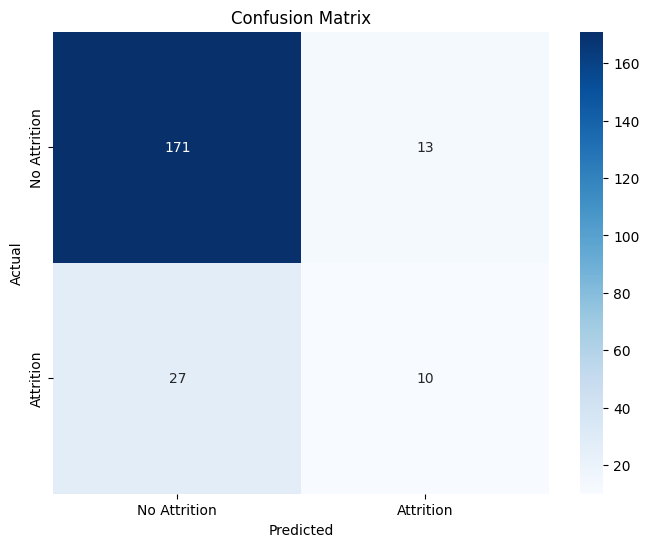

In [100]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ADASYN

In [101]:
# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 2000
error_rate = []

for i in range(min_estimators, max_estimators + 1, 40):
    randomforest = RandomForestClassifier(n_estimators = i, random_state=seed, oob_score = True)
    randomforest.fit(X_adasyn_train, y_adasyn_train)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - randomforest.oob_score_
    error_rate.append((i, oob_error))

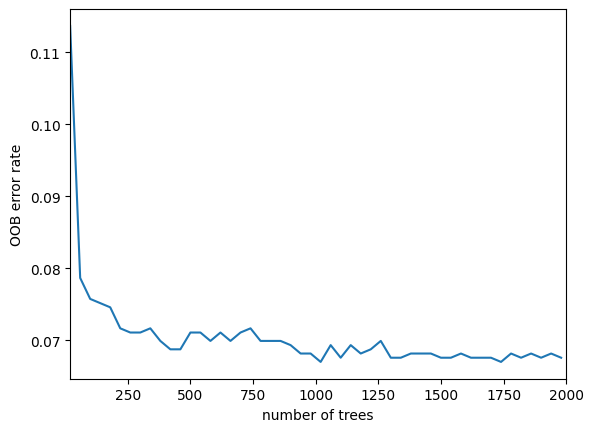

In [102]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
xvalues = []
yvalues = []
for ntrees, error in error_rate:
    xvalues.append(ntrees)
    yvalues.append(error)
    
plt.plot(xvalues, yvalues)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("number of trees")
plt.ylabel("OOB error rate")
plt.show()

In [103]:
# Hyperparameter Tuning with Grid Search
param_grid = {'min_samples_leaf': [2, 3, 4, 5], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt']}

In [104]:
rf_model = RandomForestClassifier(random_state=seed, n_estimators=1000)
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv = 10, scoring = 'recall')
grid_search.fit(X_adasyn_train, y_adasyn_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=2407),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 'sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [105]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best recall Score:", grid_search.best_score_)

Best Parameters: {'max_features': 0.5, 'min_samples_leaf': 2}
Best recall Score: 0.8801504787961697


In [106]:
# Train random forest model
rf_adasyn = grid_search.best_estimator_
rf_adasyn.set_params(oob_score=True)
rf_adasyn.fit(X_adasyn_train, y_adasyn_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=2, n_estimators=1000,
                       oob_score=True, random_state=2407)

In [107]:
# Predictions
y_train_pred = rf_adasyn.predict(X_adasyn_train)
y_validation_pred = rf_adasyn.predict(X_scaled_validation)
y_test_pred = rf_adasyn.predict(X_scaled_test)

======== OOB RESULTS ========
OOB score: 0.9166666666666666
OOB error: 0.08333333333333337


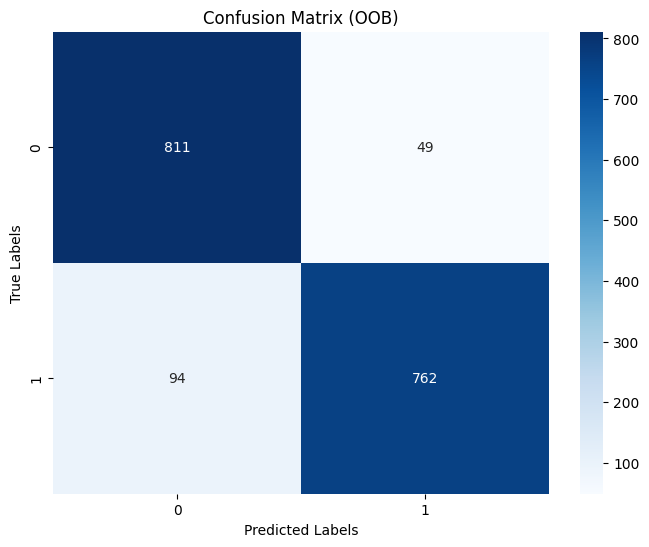

In [108]:
print("======== OOB RESULTS ========")
print("OOB score:", rf_adasyn.oob_score_)
print("OOB error:", 1 - rf_adasyn.oob_score_)

# Get the predictions on out-of-bag samples
oob_predictions = rf_adasyn.oob_decision_function_
# Convert the probabilities to class labels
oob_predicted_labels = np.argmax(oob_predictions, axis=1)
# Compute the OOB confusion matrix
confusion_oob = confusion_matrix(y_adasyn_train, oob_predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_oob, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (OOB)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.994213    0.998826  0.996503     0.996520      0.996514
recall       0.998837    0.994159  0.996503     0.996498      0.996503
f1-score     0.996520    0.996487  0.996503     0.996503      0.996503
support    860.000000  856.000000  0.996503  1716.000000   1716.000000


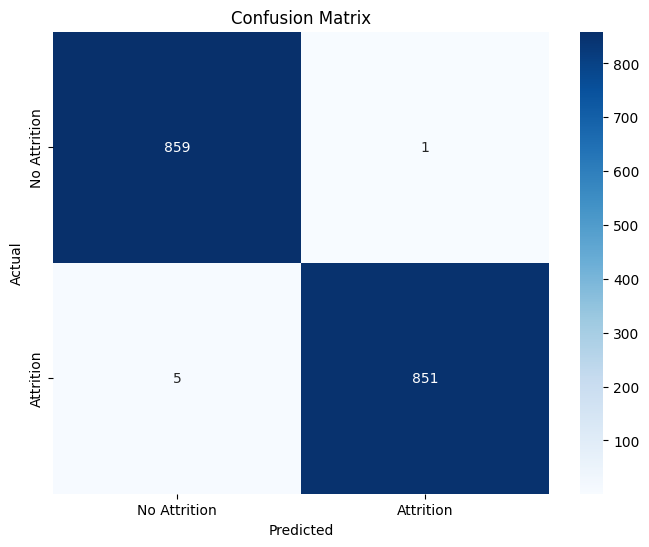

In [109]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_adasyn_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.888350   0.571429  0.868182    0.729889      0.843692
recall       0.968254   0.258065  0.868182    0.613159      0.868182
f1-score     0.926582   0.355556  0.868182    0.641069      0.846119
support    189.000000  31.000000  0.868182  220.000000    220.000000


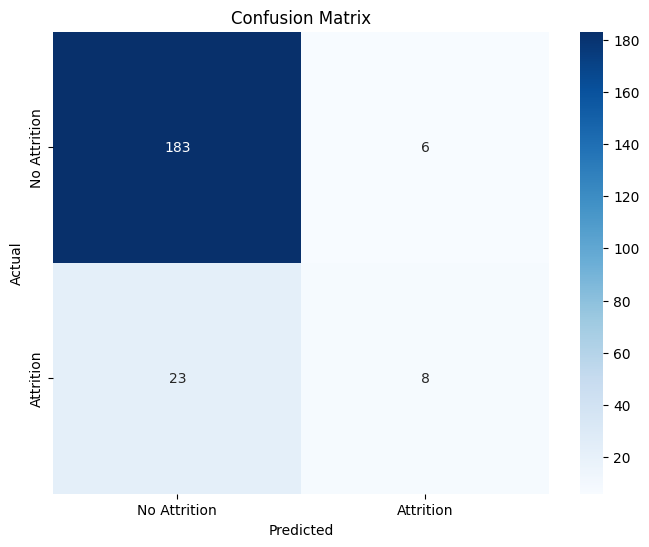

In [110]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.861538   0.384615   0.80543    0.623077      0.781692
recall       0.913043   0.270270   0.80543    0.591657      0.805430
f1-score     0.886544   0.317460   0.80543    0.602002      0.791267
support    184.000000  37.000000   0.80543  221.000000    221.000000


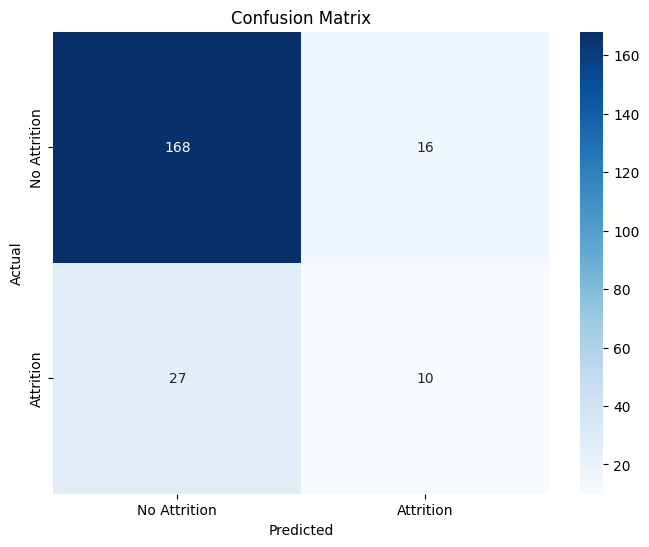

In [111]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [112]:
y_pred_rf = rf_adasyn.predict_proba(X_scaled_test)[:,1].ravel()

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_keras = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Calculate the Precision-Recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rf)
pr_auc_rf = average_precision_score(y_test, y_pred_rf)

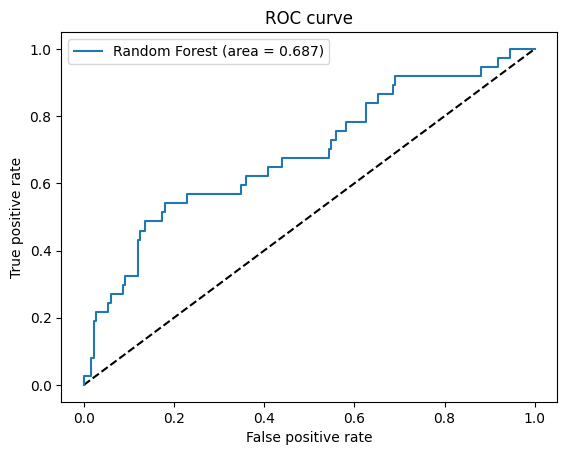

In [113]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

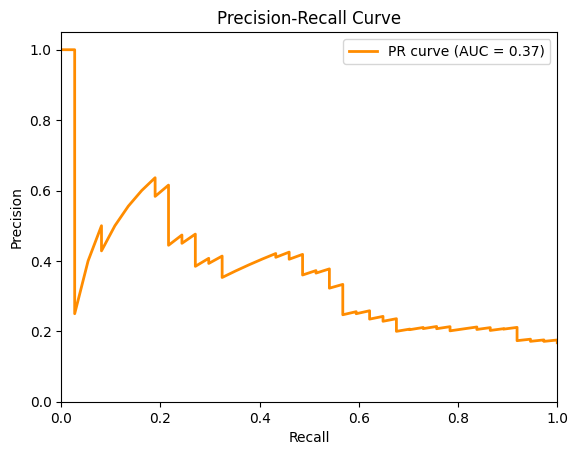

In [114]:
# Plot the Precision-Recall curve
plt.plot(recall_rf, precision_rf, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_rf)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

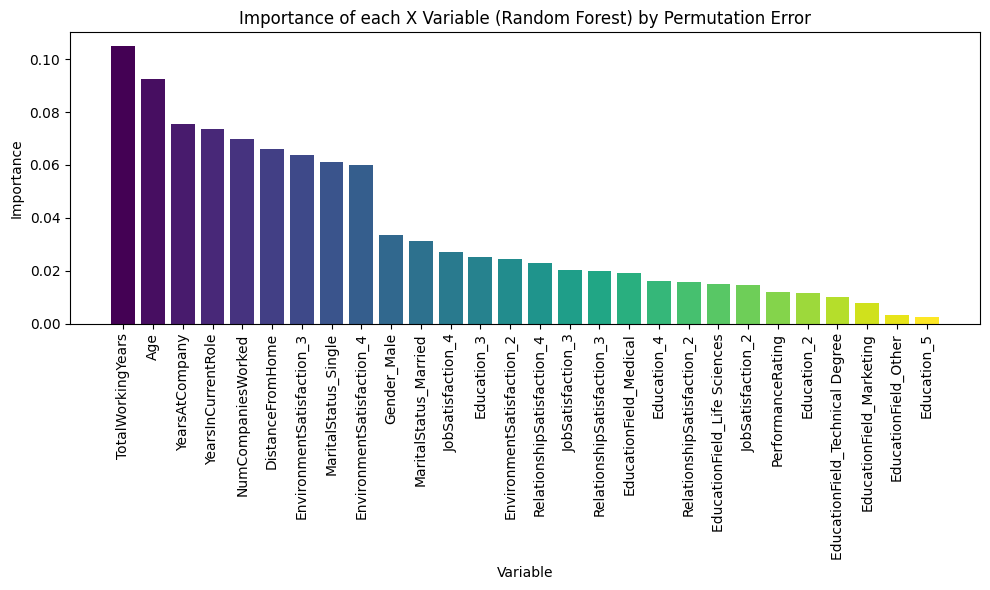

In [115]:
# Variable Importance
rf_var_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': rf_adasyn.feature_importances_
})

# Sort the DataFrame by importance in descending order
rf_var_importance_sorted = rf_var_importance.sort_values(by='Importance', ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(var_importance_sorted)))

# Create the variable importance plot
plt.figure(figsize=(10, 6))
plt.bar(rf_var_importance_sorted['Variable'], rf_var_importance_sorted['Importance'], color=colors)
plt.title("Importance of each X Variable (Random Forest) by Permutation Error")
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h1>XGBoost</h1>

XGBoost is a machine learning algorithm based on the gradient boosting framework, which sequentially trains an ensemble of weak learners (such as decision trees) and combines their predictions to improve overall model performance.

XGBoost incorporates L1 and L2 regularisation terms into the objective function to prevent overfitting and improve generalisation. XGBoost also uses tree pruning to control model complexity and prevent overfitting. It prunes trees during the learning process based on user-defined criteria such as maximum depth, minimum child weight, and minimum gain.

Most importantly, XGBoost measures the contribution of each feature to model predictions, which helps us understand the relative importance of different features in the dataset to derive business insights.

In [116]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [117]:
# A parameter grid for optimisation
params = {
        'n_estimators' : [25, 50, 100, 200, 500],
        'learning_rate' : [0.001, 0.01, 0.02, 0.05],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 10, 12, 14, 16]
        }

In [118]:
# Create XGBoost model
xgb_cfl = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [119]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best accuracy: 0.877906976744186


In [120]:
xgb_smote = random_search.best_estimator_
xgb_smote.fit(X_smote_train, y_smote_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [121]:
y_train_pred = xgb_smote.predict(X_smote_train)
y_validation_pred = xgb_smote.predict(X_scaled_validation)
y_test_pred = xgb_smote.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.972665    0.992874  0.982558     0.982770      0.982770
recall       0.993023    0.972093  0.982558     0.982558      0.982558
f1-score     0.982739    0.982374  0.982558     0.982556      0.982556
support    860.000000  860.000000  0.982558  1720.000000   1720.000000


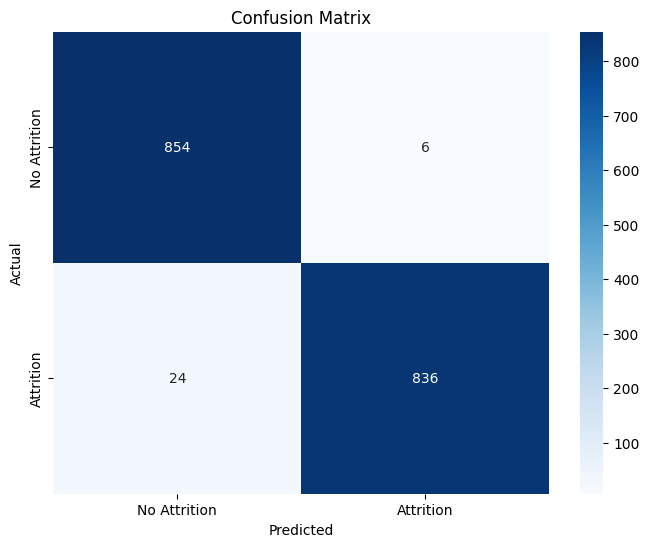

In [122]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_smote_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_smote_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== VALIDATION SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.907216   0.500000  0.859091    0.703608      0.849836
recall       0.931217   0.419355  0.859091    0.675286      0.859091
f1-score     0.919060   0.456140  0.859091    0.687600      0.853830
support    189.000000  31.000000  0.859091  220.000000    220.000000


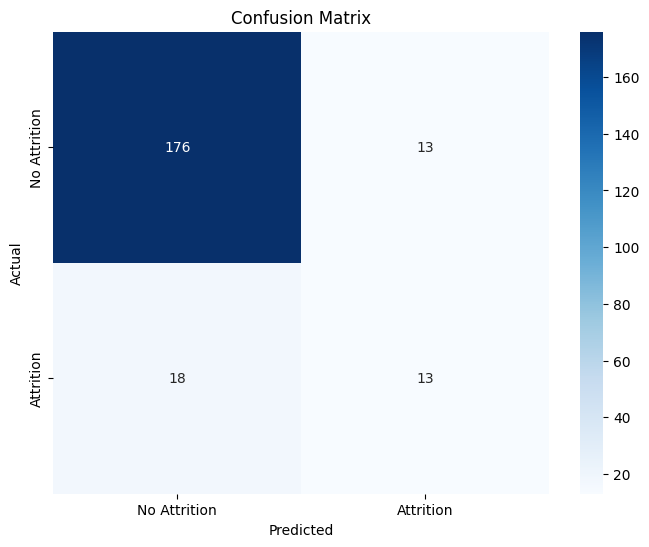

In [123]:
print("\n======== VALIDATION SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.869792   0.413793  0.809955    0.641792      0.793448
recall       0.907609   0.324324  0.809955    0.615967      0.809955
f1-score     0.888298   0.363636  0.809955    0.625967      0.800459
support    184.000000  37.000000  0.809955  221.000000    221.000000


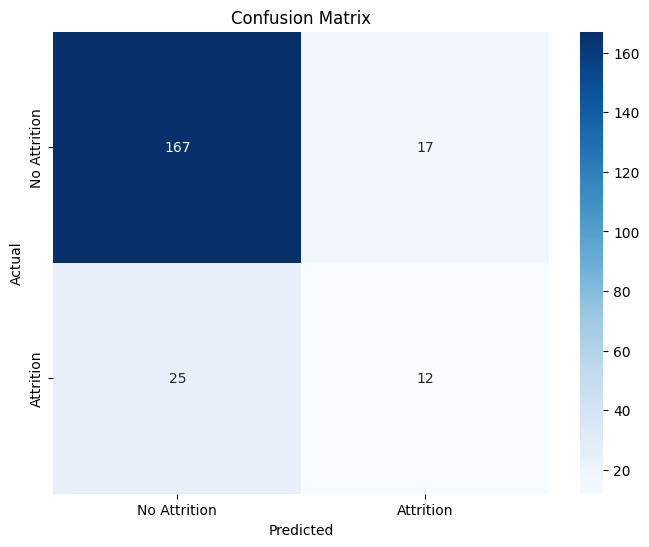

In [124]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [125]:
# Create XGBoost model
xgb_adasyn = xgb.XGBClassifier(random_state = 2407, n_jobs = -1)

random_search = RandomizedSearchCV(xgb_adasyn, param_distributions=params, n_iter=800, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=2407)

random_search.fit(X_adasyn_train, y_adasyn_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=2407, ...),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.01, 0.1, 0.5, 1, 1.5],
                                        'learning_rate': [0.001, 0.01, 0.02,
                                                          0.05],
                                        'max_depth': [5, 10, 12, 14, 16],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [25, 50, 100, 200, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=2407, scoring='recall', verbose=3)

In [126]:
print('Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
print('Best accuracy:', random_search.best_score_)

Best hyperparameters:
{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 14, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best accuracy: 0.8533319733442133


In [127]:
xgb_adasyn = random_search.best_estimator_
xgb_adasyn.fit(X_adasyn_train, y_adasyn_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, random_state=2407, ...)

In [128]:
y_train_pred = xgb_adasyn.predict(X_adasyn_train)
y_validation_pred = xgb_adasyn.predict(X_scaled_validation)
y_test_pred = xgb_adasyn.predict(X_scaled_test)

======== TRAIN SET RESULTS ========

Classification Report: 
                False        True  accuracy    macro avg  weighted avg
precision    0.976000    0.992866  0.984266     0.984433      0.984413
recall       0.993023    0.975467  0.984266     0.984245      0.984266
f1-score     0.984438    0.984090  0.984266     0.984264      0.984264
support    860.000000  856.000000  0.984266  1716.000000   1716.000000


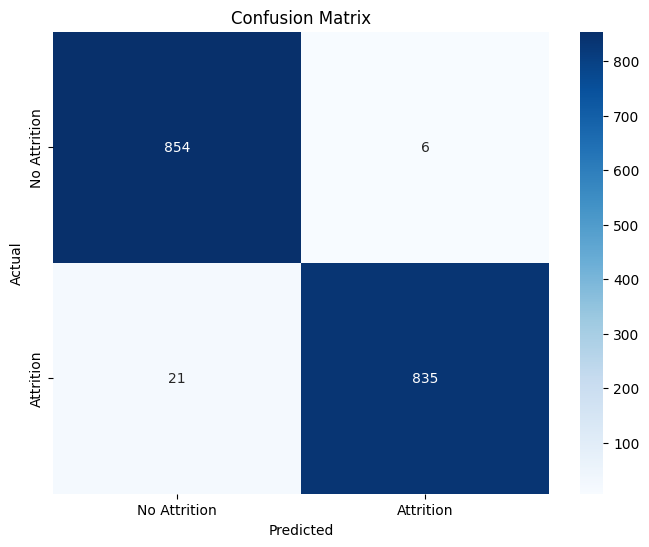

In [129]:
print("======== TRAIN SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_adasyn_train, y_train_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_adasyn_train, y_train_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.880000   0.350000  0.831818    0.615000      0.805318
recall       0.931217   0.225806  0.831818    0.578512      0.831818
f1-score     0.904884   0.274510  0.831818    0.589697      0.816059
support    189.000000  31.000000  0.831818  220.000000    220.000000


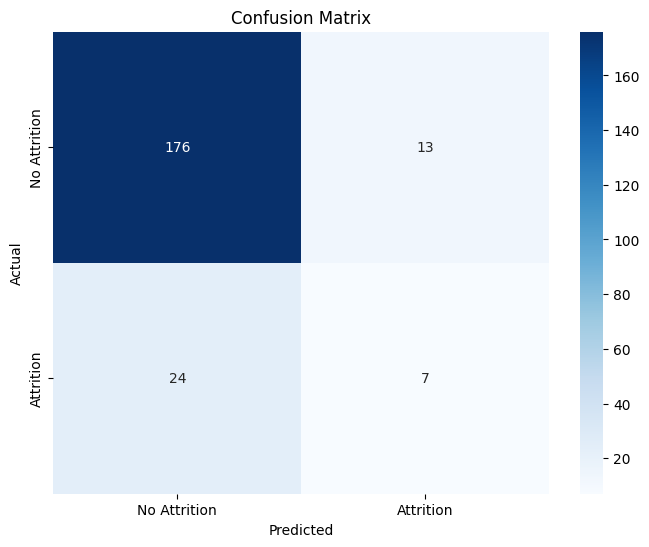

In [130]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_validation, y_validation_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_validation, y_validation_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


======== TEST SET RESULTS ========

Classification Report: 
                False       True  accuracy   macro avg  weighted avg
precision    0.862245   0.400000  0.809955    0.631122      0.784855
recall       0.918478   0.270270  0.809955    0.594374      0.809955
f1-score     0.889474   0.322581  0.809955    0.606027      0.794564
support    184.000000  37.000000  0.809955  221.000000    221.000000


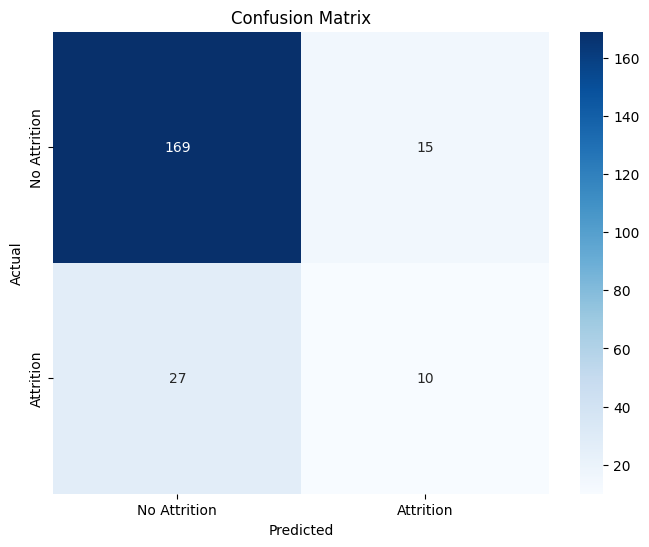

In [131]:
print("\n======== TEST SET RESULTS ========")
clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
print(f"\nClassification Report: \n{clf_report}")

# Create a heatmap for the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_test_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SMOTE is better

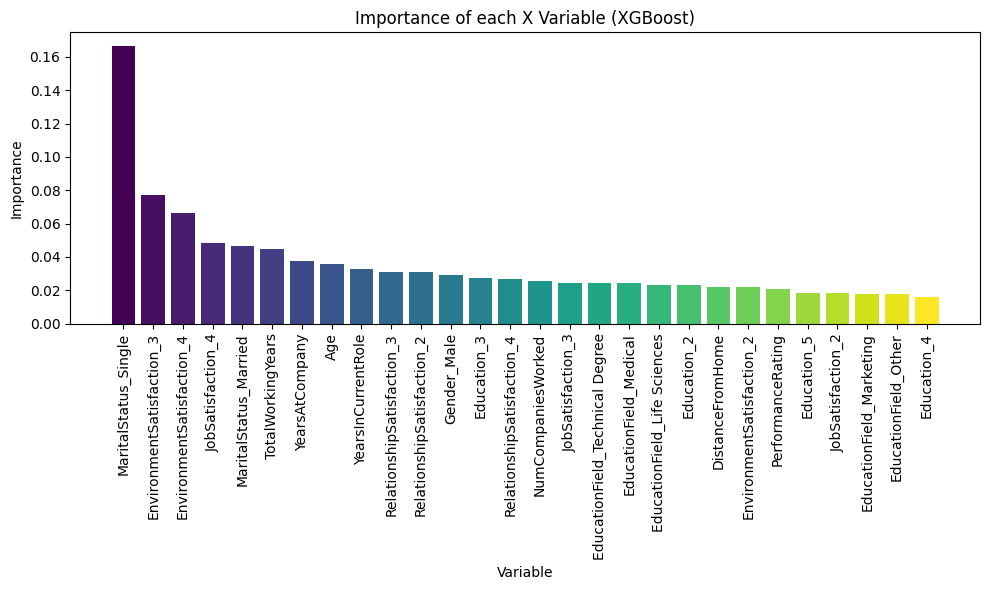

In [132]:
# Create the variable importance plot
xgb_var_importance = pd.DataFrame({
    'Variable': X_train.columns, 
    'Importance': xgb_smote.feature_importances_
})
xgb_var_importance_sorted = xgb_var_importance.sort_values(by='Importance',ascending=False)

# Create a color gradient for the bars using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(X_train.columns)))

plt.figure(figsize = (10,6))
plt.bar(xgb_var_importance_sorted['Variable'], xgb_var_importance_sorted['Importance'], color=colors)
plt.title('Importance of each X Variable (XGBoost)')
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [133]:
y_pred_xgb = xgb_smote.predict_proba(X_scaled_test)[:,1].ravel()

#  Calculate the ROC curve
fpr_xgb, tpr_xgb, thresholds_keras = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculate the Precision-Recall curve
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xgb)
pr_auc_xgb = average_precision_score(y_test, y_pred_xgb)

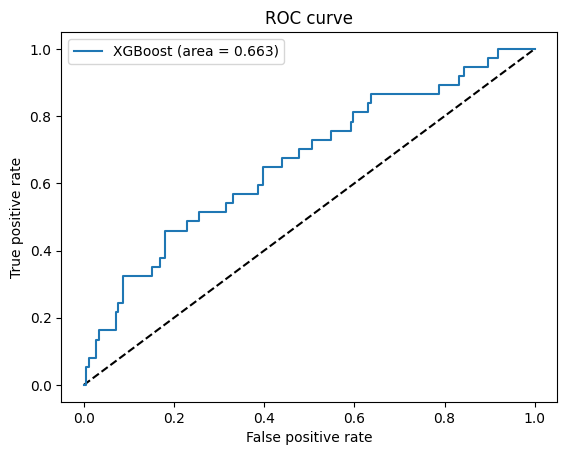

In [134]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (area = {:.3f})'.format(auc_xgb))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

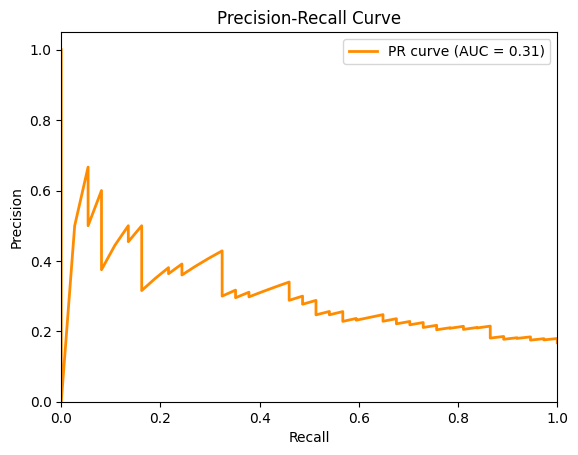

In [135]:
# Plot the Precision-Recall curve
plt.plot(recall_xgb, precision_xgb, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

<h1>Model Comparison</h1>

The ROC curve represents the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds.
The true positive rate (TPR), also known as recall, measures the proportion of actual positive cases that are correctly identified by the model while the false positive rate (FPR) measures the proportion of actual negative cases that are incorrectly classified as positive by the model.

The closer the ROC curve is to the top-left corner, the better the classifier's performance in distinguishing between positive and negative cases. A higher area under curve (AUC) indicates better discrimination ability, with a maximum value of 1 for a perfect classifier.

Considering the tradeoff between TP and FP, increasing TPR even at the expense of increasing FPR is preferred as the cost of attrition is generally higher than preventive measures to reduce attrition. However, too many incorrect predictions is also undesirable as it would lead to excessive losses.

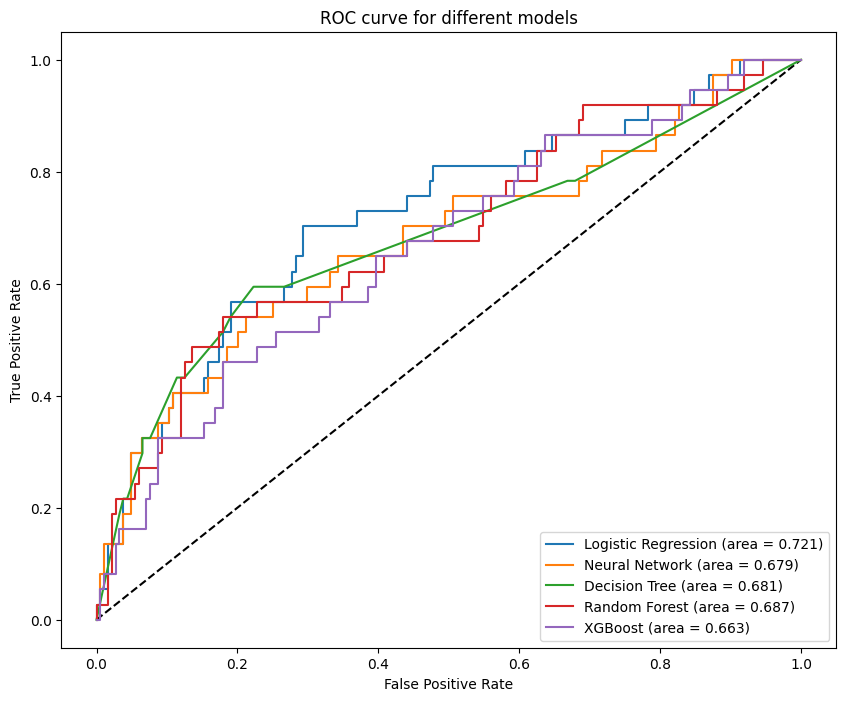

In [136]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
auc_values = [auc_log, auc_nn, auc_cart, auc_rf, auc_xgb]
fpr_values = [fpr_log, fpr_nn, fpr_cart, fpr_rf, fpr_xgb]
tpr_values = [tpr_log, tpr_nn, tpr_cart, tpr_rf, tpr_xgb]

# Plotting the ROC curves for each classifier
plt.figure(figsize=(10, 8))

# Plot the diagonal (random guess)
plt.plot([0, 1], [0, 1], 'k--')

# Plot ROC curve for each classifier
for classifier, fpr, tpr, auc_value in zip(classifiers, fpr_values, tpr_values, auc_values):
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(classifier, auc_value))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for different models')
plt.legend(loc='lower right')
plt.show()

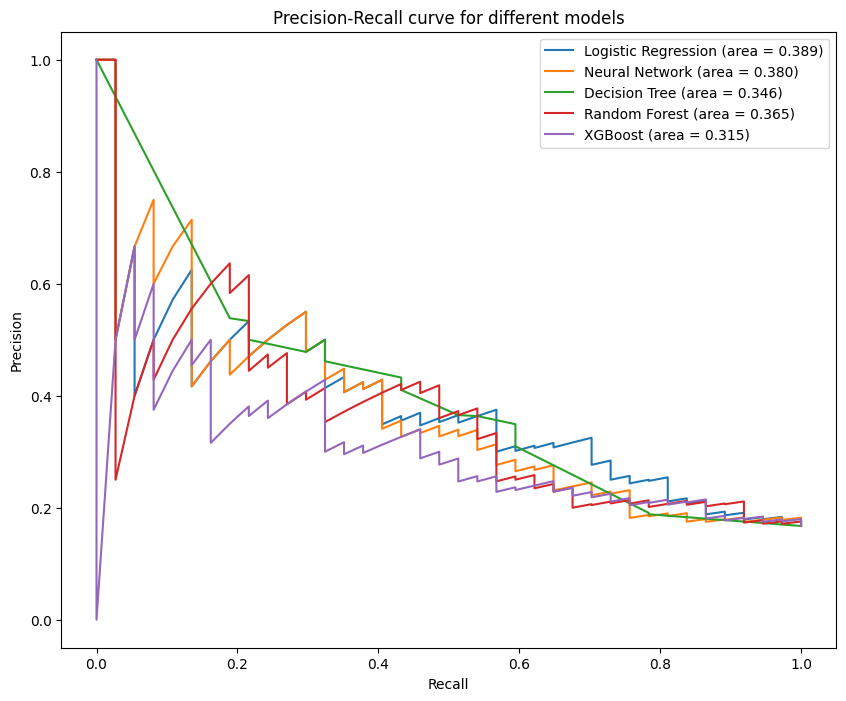

In [138]:
classifiers = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'XGBoost']
pr_auc_values = [pr_auc_log, pr_auc_nn, pr_auc_cart, pr_auc_rf, pr_auc_xgb]
recall_values = [recall_log, recall_nn, recall_cart, recall_rf, recall_xgb]
precision_values = [precision_log, precision_nn, precision_cart, precision_rf, precision_xgb]

# Plotting the PR curves for each classifier
plt.figure(figsize=(10, 8))

for classifier, recall, precision, pr_auc_value in zip(classifiers, recall_values, precision_values, pr_auc_values):
    plt.plot(recall, precision, label='{} (area = {:.3f})'.format(classifier, pr_auc_value))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for different models')
plt.legend(loc='best')
plt.show()

From the graph, Neural Network is the best model as it is able to achieve the highest TPR to FPR ratio across a wide range of classification thresholds. Although Logistic Regression overtakes Neural Network at a point, maximising the TPR is preferred and Neural Network is the best model to suit our business needs.